In [1]:

getwd()

[1] "/kaggle/working"

In [2]:

data1 <- read.csv("../input/retail-analysis-with-walmart-sales-data/WALMART_SALES_DATA.csv")

In [4]:
head(data1)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
,<int>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,05-02-2010,1643691,0,42.31,2.572,211.0964,8.106
2,1,12-02-2010,1641957,1,38.51,2.548,211.2422,8.106
3,1,19-02-2010,1611968,0,39.93,2.514,211.2891,8.106
4,1,26-02-2010,1409728,0,46.63,2.561,211.3196,8.106
5,1,05-03-2010,1554807,0,46.50,2.625,211.3501,8.106
6,1,12-03-2010,1439542,0,57.79,2.667,211.3806,8.106


In [5]:

dim(data1)

[1] 6435    8

In [6]:

class(data1)

[1] "data.frame"

In [7]:

str(data1)

'data.frame':	6435 obs. of  8 variables:
 $ Store       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Date        : chr  "05-02-2010" "12-02-2010" "19-02-2010" "26-02-2010" ...
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...


In [8]:

summary(data1)

     Store        Date            Weekly_Sales      Holiday_Flag    
 Min.   : 1   Length:6435        Min.   : 209986   Min.   :0.00000  
 1st Qu.:12   Class :character   1st Qu.: 553350   1st Qu.:0.00000  
 Median :23   Mode  :character   Median : 960746   Median :0.00000  
 Mean   :23                      Mean   :1046965   Mean   :0.06993  
 3rd Qu.:34                      3rd Qu.:1420159   3rd Qu.:0.00000  
 Max.   :45                      Max.   :3818686   Max.   :1.00000  
  Temperature       Fuel_Price         CPI         Unemployment   
 Min.   : -2.06   Min.   :2.472   Min.   :126.1   Min.   : 3.879  
 1st Qu.: 47.46   1st Qu.:2.933   1st Qu.:131.7   1st Qu.: 6.891  
 Median : 62.67   Median :3.445   Median :182.6   Median : 7.874  
 Mean   : 60.66   Mean   :3.359   Mean   :171.6   Mean   : 7.999  
 3rd Qu.: 74.94   3rd Qu.:3.735   3rd Qu.:212.7   3rd Qu.: 8.622  
 Max.   :100.14   Max.   :4.468   Max.   :227.2   Max.   :14.313  

In [9]:

table(data1$Store)

table(data1$Holiday_Flag)


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 143 
 41  42  43  44  45 
143 143 143 143 143 


   0    1 
5985  450 

In [10]:
 
colSums(is.na(data1)) 

Store         Date Weekly_Sales Holiday_Flag  Temperature   Fuel_Price 
           0            0            0            0            0            0 
         CPI Unemployment 
           0            0

In [11]:

all(duplicated(data1) == TRUE)


[1] FALSE

In [12]:

Store_Sales<- aggregate(Weekly_Sales ~ Store, data = data1, sum)

 
colnames(Store_Sales)[2] <- "Total_Sales_by_Store"
 

Store_Sales <-arrange(Store_Sales, desc(Total_Sales_by_Store)) 
Store_Sales[1,] 

,Store,Total_Sales_by_Store
,<int>,<dbl>
1,20,301397792


In [13]:

print(paste('Store no.', Store_Sales[1,]$Store,
'has the maximum sales and the value is = ', Store_Sales[1,]$Total_Sales_by_Store))

[1] "Store no. 20 has the maximum sales and the value is =  301397792.46"


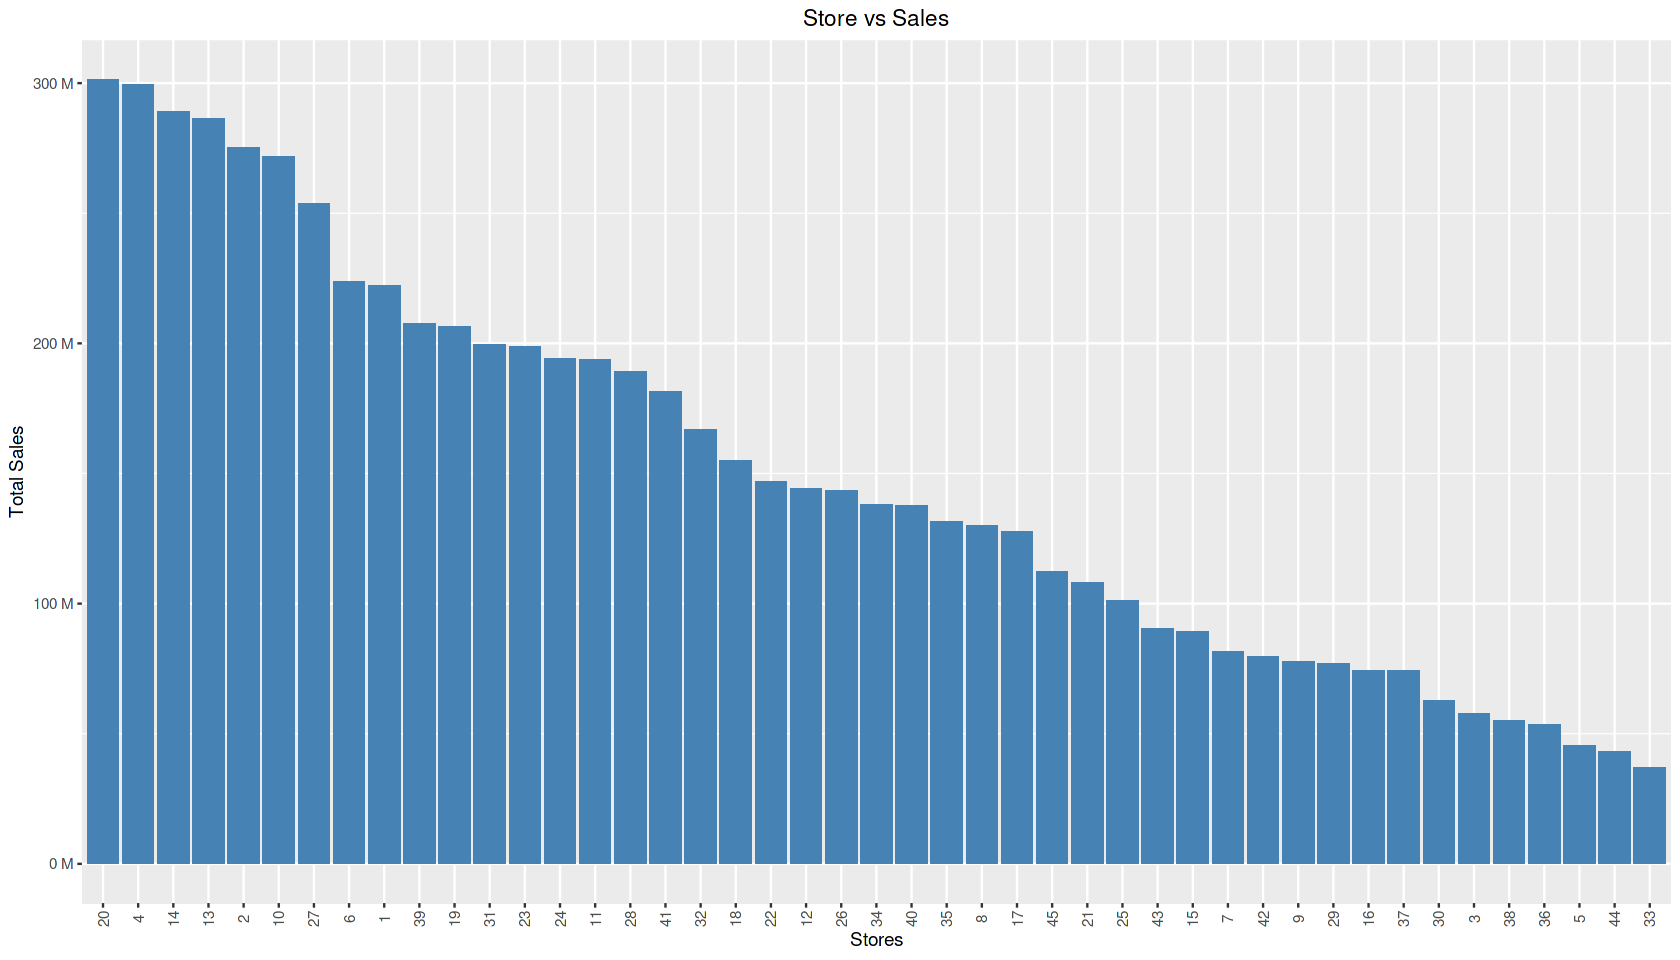

In [14]:

Store_Sales$Store <- as.character(Store_Sales$Store)
Store_Sales$Store <- factor(Store_Sales$Store, levels=unique(Store_Sales$Store))





options(repr.plot.width = 14, repr.plot.height = 8)

a<-ggplot(data=Store_Sales, aes(x=Store, y=Total_Sales_by_Store)) + geom_bar(stat="identity",fill="steelblue") +
theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust=0.5))+ scale_x_discrete(breaks = data1$Store)+
scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))+ ggtitle('Store vs Sales')+
theme(plot.title = element_text(hjust = 0.5))+
xlab("Stores") + ylab("Total Sales")
a

In [15]:

Store_Sales_Variation<-summarise(group_by(data1,Store),sd(Weekly_Sales), mean(Weekly_Sales))


colnames(Store_Sales_Variation)[2] <- "StandardDeviation_Sales_by_Store"
colnames(Store_Sales_Variation)[3] <- "Mean_Sales_by_Store"

 
Store_Sales_Variation<- mutate(Store_Sales_Variation,CV_Sales_by_Store = (StandardDeviation_Sales_by_Store/Mean_Sales_by_Store)*100)

In [16]:
 
Store_Sales_Variation[which.max(Store_Sales_Variation$StandardDeviation_Sales_by_Store), ]


store_sales_max_std <- Store_Sales_Variation[which.max(Store_Sales_Variation$StandardDeviation_Sales_by_Store), ]$Store


max_sd <- Store_Sales_Variation[which.max(Store_Sales_Variation$StandardDeviation_Sales_by_Store), ]$StandardDeviation_Sales_by_Store


CV_max_sd <- Store_Sales_Variation[which.max(Store_Sales_Variation$StandardDeviation_Sales_by_Store), ]$CV_Sales_by_Store


print(paste('Store no. ', store_sales_max_std,
'has the maximum standard deviation of ', max_sd, 'Coefficient of Variation = ',CV_max_sd ))

Store,StandardDeviation_Sales_by_Store,Mean_Sales_by_Store,CV_Sales_by_Store
<int>,<dbl>,<dbl>,<dbl>
14,317569.9,2020978,15.71367


[1] "Store no.  14 has the maximum standard deviation of  317569.949475508 Coefficient of Variation =  15.7136736009483"


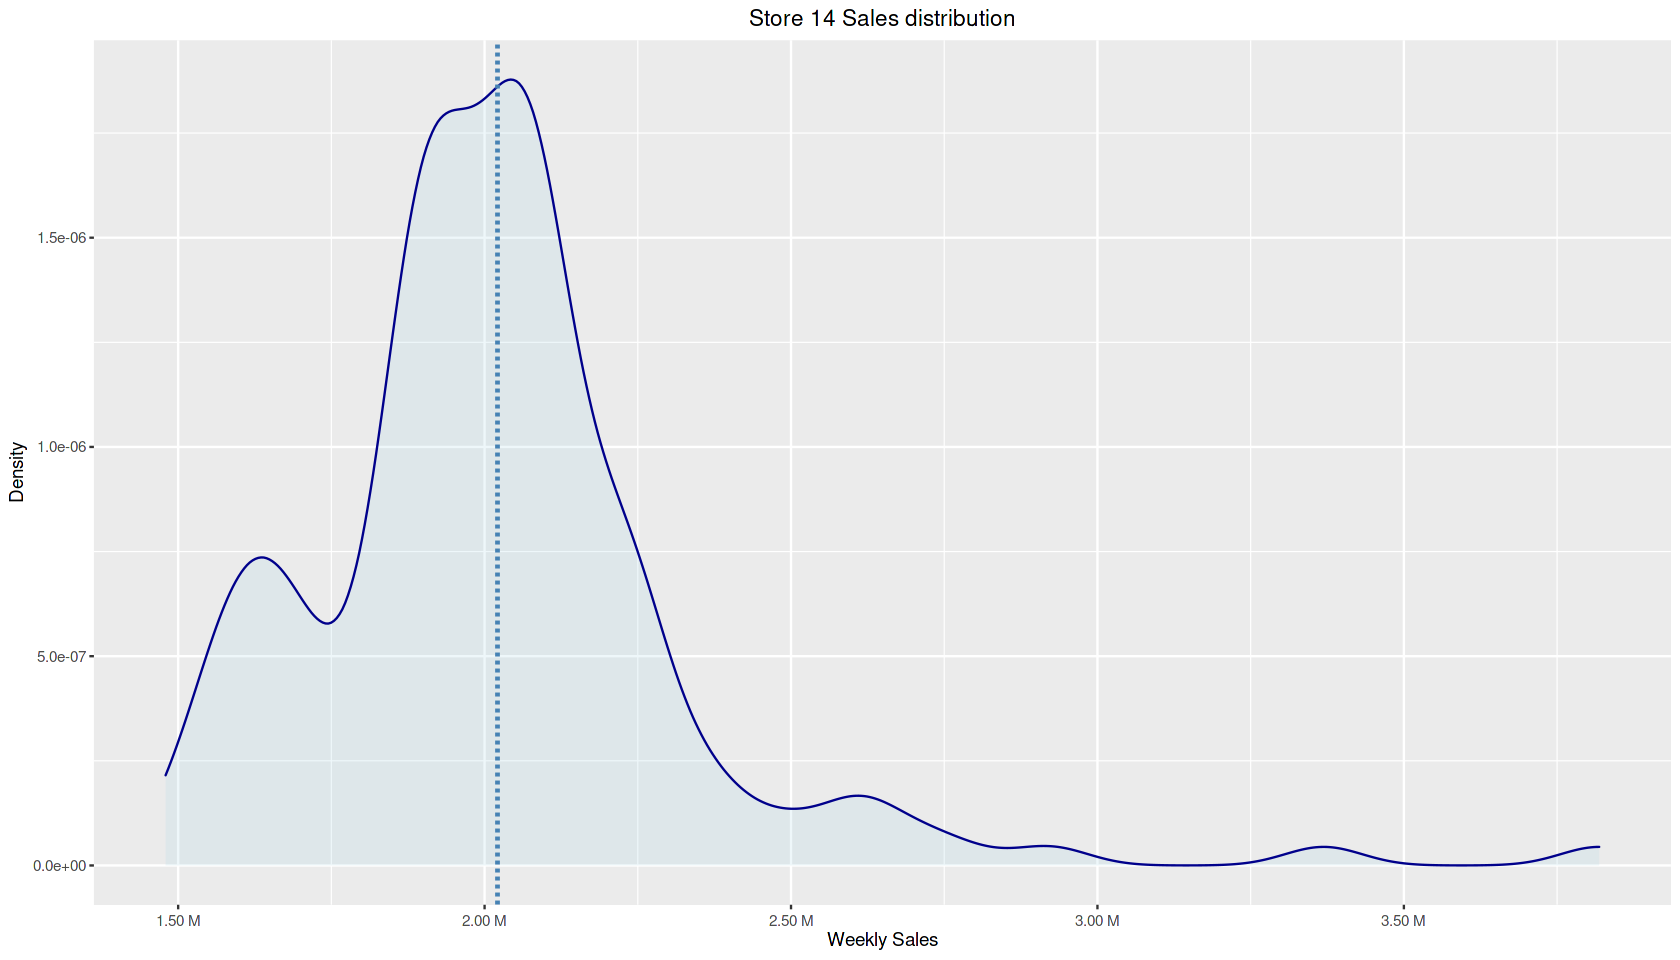

In [17]:
options(repr.plot.width = 14, repr.plot.height = 8)


Store_14 <- data1[data1$Store == 14, ]
p <- ggplot(Store_14, aes(x=Weekly_Sales)) + geom_density(color="darkblue", fill="lightblue",alpha=0.2)+
geom_vline(aes(xintercept= mean(Weekly_Sales)),color="steelblue", linetype="dashed", size=1)+
theme(axis.text.x = element_text(vjust = 0.5, hjust=0.5))+ scale_x_continuous(labels = label_number(suffix = " M", scale = 1e-6))+ ggtitle('Store 14 Sales distribution')+
theme(plot.title = element_text(hjust = 0.5))+
xlab("Weekly Sales") + ylab("Density")
p

In [18]:
 
data2<-data1


data2$month_Year = substr(data2$Date, 4, 10)


Q3_2012 <- filter(data2,month_Year == "07-2012" | month_Year== "08-2012" | month_Year== "09-2012")
Q2_2012 <- filter(data2,month_Year == "04-2012" | month_Year== "05-2012" | month_Year== "06-2012")


Q3_2012_Sales<-summarise(group_by(Q3_2012,Store),sum(Weekly_Sales))


colnames(Q3_2012_Sales)[2] <- "Q3_2012_Sales_by_Store"


Q2_2012_Sales<-summarise(group_by(Q2_2012,Store),sum(Weekly_Sales))


colnames(Q2_2012_Sales)[2] <- "Q2_2012_Sales_by_Store"


Q3_2012_Growthrate <- merge ( Q2_2012_Sales , Q3_2012_Sales , by = 'Store')


Q3_2012_Growthrate <- mutate(Q3_2012_Growthrate, Growth_Rate = ((Q3_2012_Sales_by_Store - Q2_2012_Sales_by_Store)*100) / Q2_2012_Sales_by_Store)


positive_growthrate <- filter(Q3_2012_Growthrate, Growth_Rate > 0 ) 
positive_growthrate<-arrange(positive_growthrate, desc(Growth_Rate)) 
View(positive_growthrate)
a<- positive_growthrate$Store


print(paste(c('The positive growth rate Stores are', a),collapse=" " )) 
print(paste('Store',positive_growthrate[1,1], 'has highest growth rate & it is',positive_growthrate[1,4]))



Store,Q2_2012_Sales_by_Store,Q3_2012_Sales_by_Store,Growth_Rate
<int>,<dbl>,<dbl>,<dbl>
7,7290859,8262787,13.3307760
16,6564336,7121542,8.4883781
35,10838313,11322421,4.4666372
26,13155336,13675692,3.9554775
39,20214128,20715116,2.4784040
41,17659943,18093844,2.4569801
44,4306406,4411251,2.4346377
24,17684219,17976378,1.6520877
40,12727738,12873195,1.1428413


[1] "The positive growth rate Stores are 7 16 35 26 39 41 44 24 40 23"
[1] "Store 7 has highest growth rate & it is 13.330776030738"


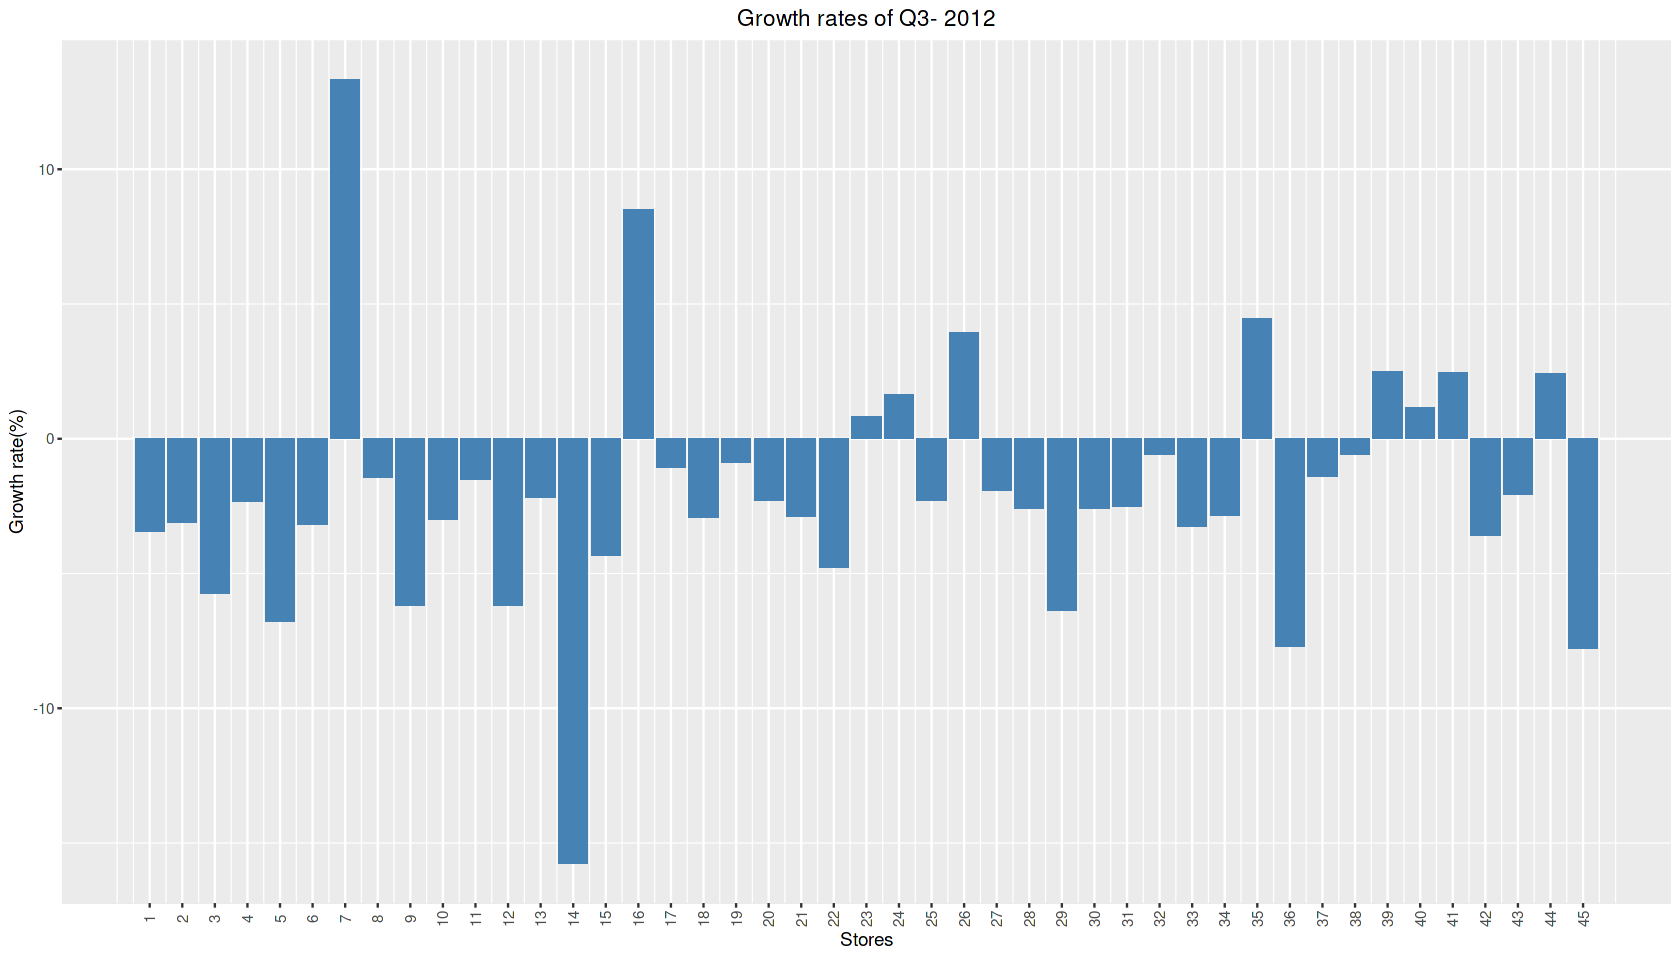

In [19]:
options(repr.plot.width = 14, repr.plot.height = 8)


c<-ggplot(data=Q3_2012_Growthrate, aes(x=Store, y=Growth_Rate)) +geom_bar(stat ="identity",fill="steelblue")+
ggtitle('Growth rates of Q3- 2012')+
theme(plot.title = element_text(hjust = 0.5))+
xlab("Stores") + ylab("Growth rate(%)") +
scale_x_continuous("Stores", labels = as.character(Q3_2012_Growthrate$Store), breaks =
Q3_2012_Growthrate$Store)+
theme(axis.text.x = element_text(angle = 90,vjust = 0.5, hjust=0.5))
c

In [20]:
Holiday_date <- c("12-02-2010", "11-02-2011", "10-02-2012", "08-02-2013","10-09-2010", "09-09-2011", "07-09-2012", "06-09-2013","26-11-2010", "25-11-2011", "23-11-2012", "29- 11-2013","31-12-2010", "30-12-2011", "28-12-2012", "27-12-2013")
Events <-c(rep("Super Bowl", 4), rep("Labour Day", 4),rep("Thanksgiving", 4), rep("Christmas", 4))
Holidays_Data <- data.frame(Events,Holiday_date)

data3<-merge(data1,Holidays_Data, by.x= "Date", by.y="Holiday_date", all.x = TRUE)
 
data3$Events = as.character(data3$Events) 
data3$Events[is.na(data3$Events)]= "No_Holiday" 
head(data3)

,Date,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Events
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,01-04-2011,1,1495064.8,0,59.17,3.524,214.8372,7.682,No_Holiday
2,01-04-2011,2,1800171.4,0,55.43,3.524,214.4887,7.931,No_Holiday
3,01-04-2011,3,374556.1,0,68.76,3.524,218.2114,7.574,No_Holiday
4,01-04-2011,4,1900246.5,0,56.99,3.521,128.7199,5.946,No_Holiday
5,01-04-2011,5,314316.5,0,61.50,3.524,215.4024,6.489,No_Holiday
6,01-04-2011,6,1459276.8,0,62.25,3.524,216.3841,6.855,No_Holiday


In [21]:

Holiday_Sales<-aggregate(Weekly_Sales ~ Events, data = data3, mean)

colnames(Holiday_Sales)[2] <- "Mean_Sales_by_Event_Type"
View(Holiday_Sales)



Events,Mean_Sales_by_Event_Type
<chr>,<dbl>
Christmas,960833.1
Labour Day,1042427.3
No_Holiday,1041256.4
Super Bowl,1079128.0
Thanksgiving,1471273.4


In [22]:

Holiday_date <- filter(data3,Holiday_Flag ==1)
Holiday_Date_Sales<-summarise(group_by(Holiday_date,Date),mean(Weekly_Sales))


mean_non_holiday_sales <- mean(filter(data3,Holiday_Flag ==0)$Weekly_Sales) 
Holiday_Date_Sales$higher_than_non_holiday <- Holiday_Date_Sales[,2] > mean_non_holiday_sales
View(Holiday_Date_Sales)

Date,mean(Weekly_Sales),higher_than_non_holiday
<chr>,<dbl>,"<lgl[,1]>"
07-09-2012,1074001.3,TRUE
09-09-2011,1039182.8,FALSE
10-02-2012,1111320.2,TRUE
10-09-2010,1014097.7,FALSE
11-02-2011,1051915.4,TRUE
12-02-2010,1074148.4,TRUE
25-11-2011,1479857.9,TRUE
26-11-2010,1462689.0,TRUE
30-12-2011,1023165.8,FALSE


In [23]:
weekly_sales <- aggregate(Weekly_Sales~Date, data=data1,mean)
weekly_sales$Date <-as.Date(weekly_sales$Date, "%d-%m-%Y")
weekly_sales <-arrange(weekly_sales,Date)
weekly_sales$Date <-factor(weekly_sales$Date)


options(repr.plot.width = 14, repr.plot.height = 8)


d <- ggplot(data=weekly_sales, aes(x=Date, y=Weekly_Sales, group=1)) +
geom_line(color="steelblue")+
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_x_discrete(breaks = levels(weekly_sales$Date)[c(T, rep(F, 9))])+
scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("Week") + ylab("Mean Sales of Week")

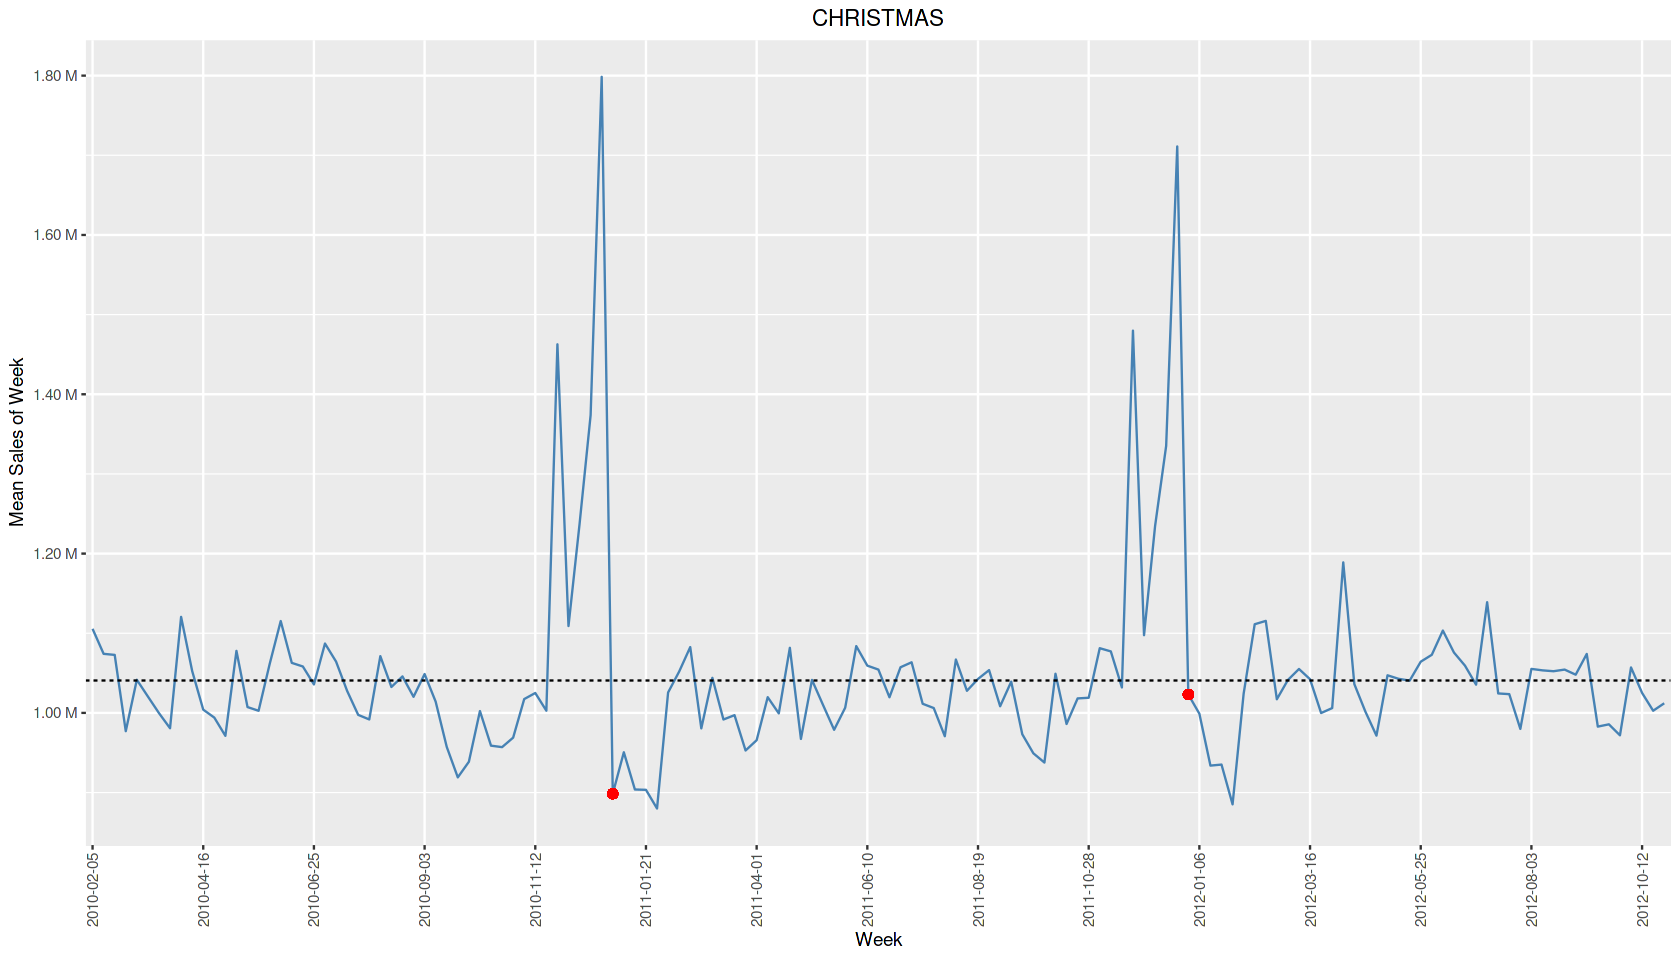

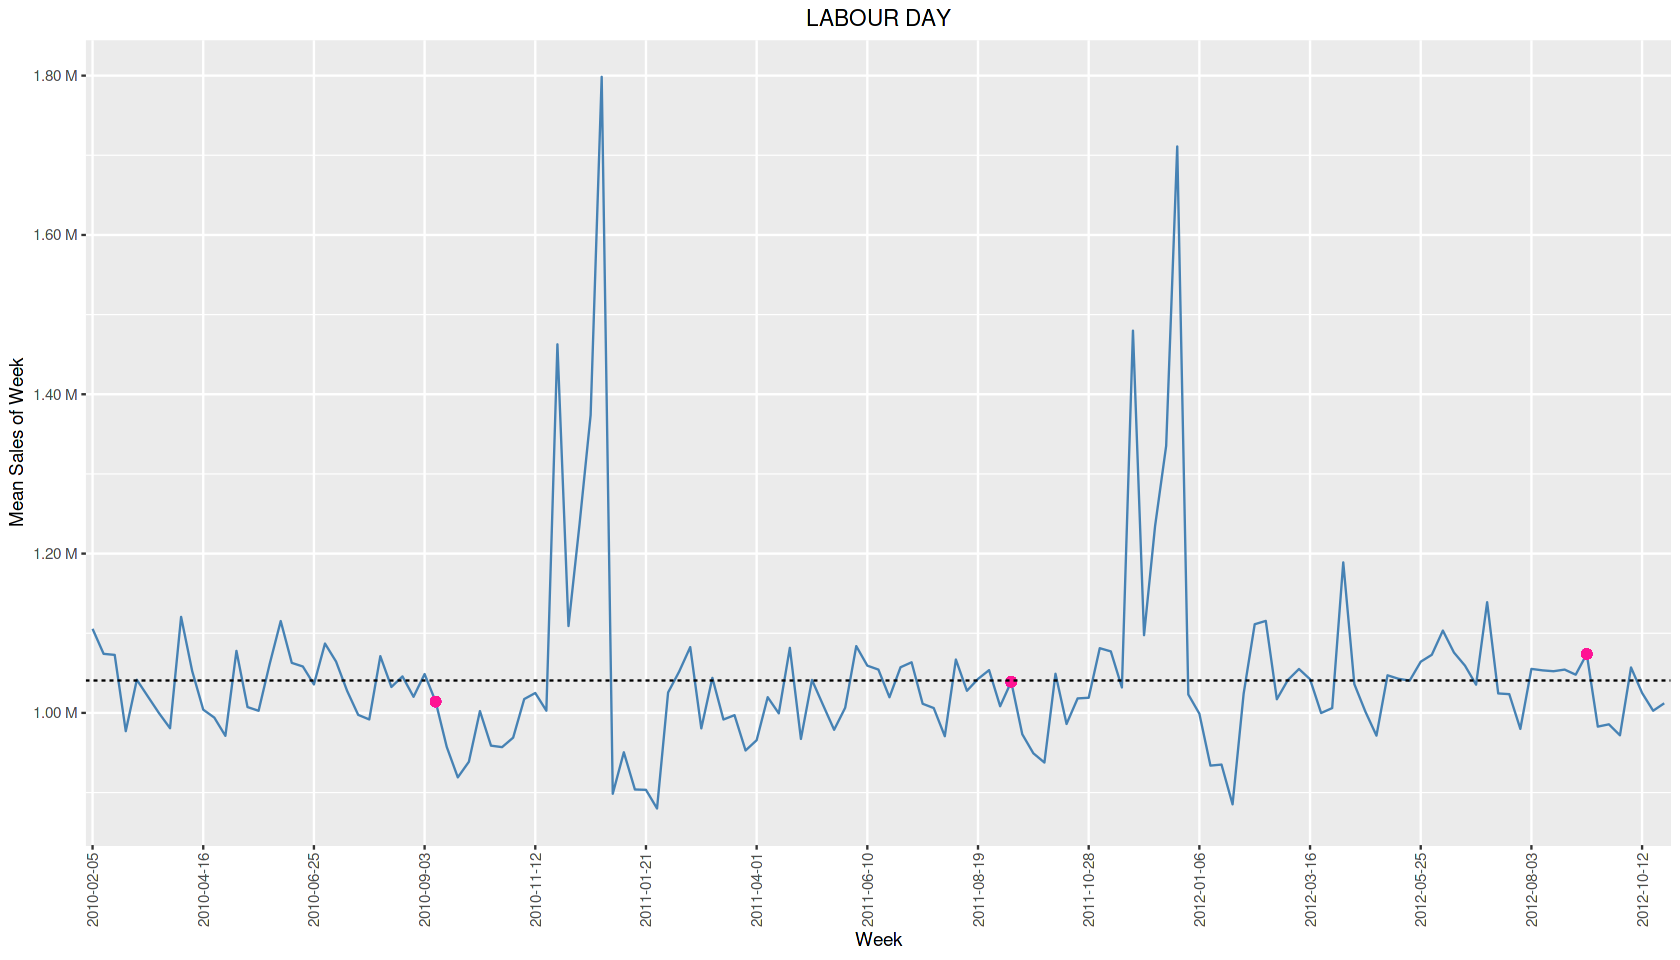

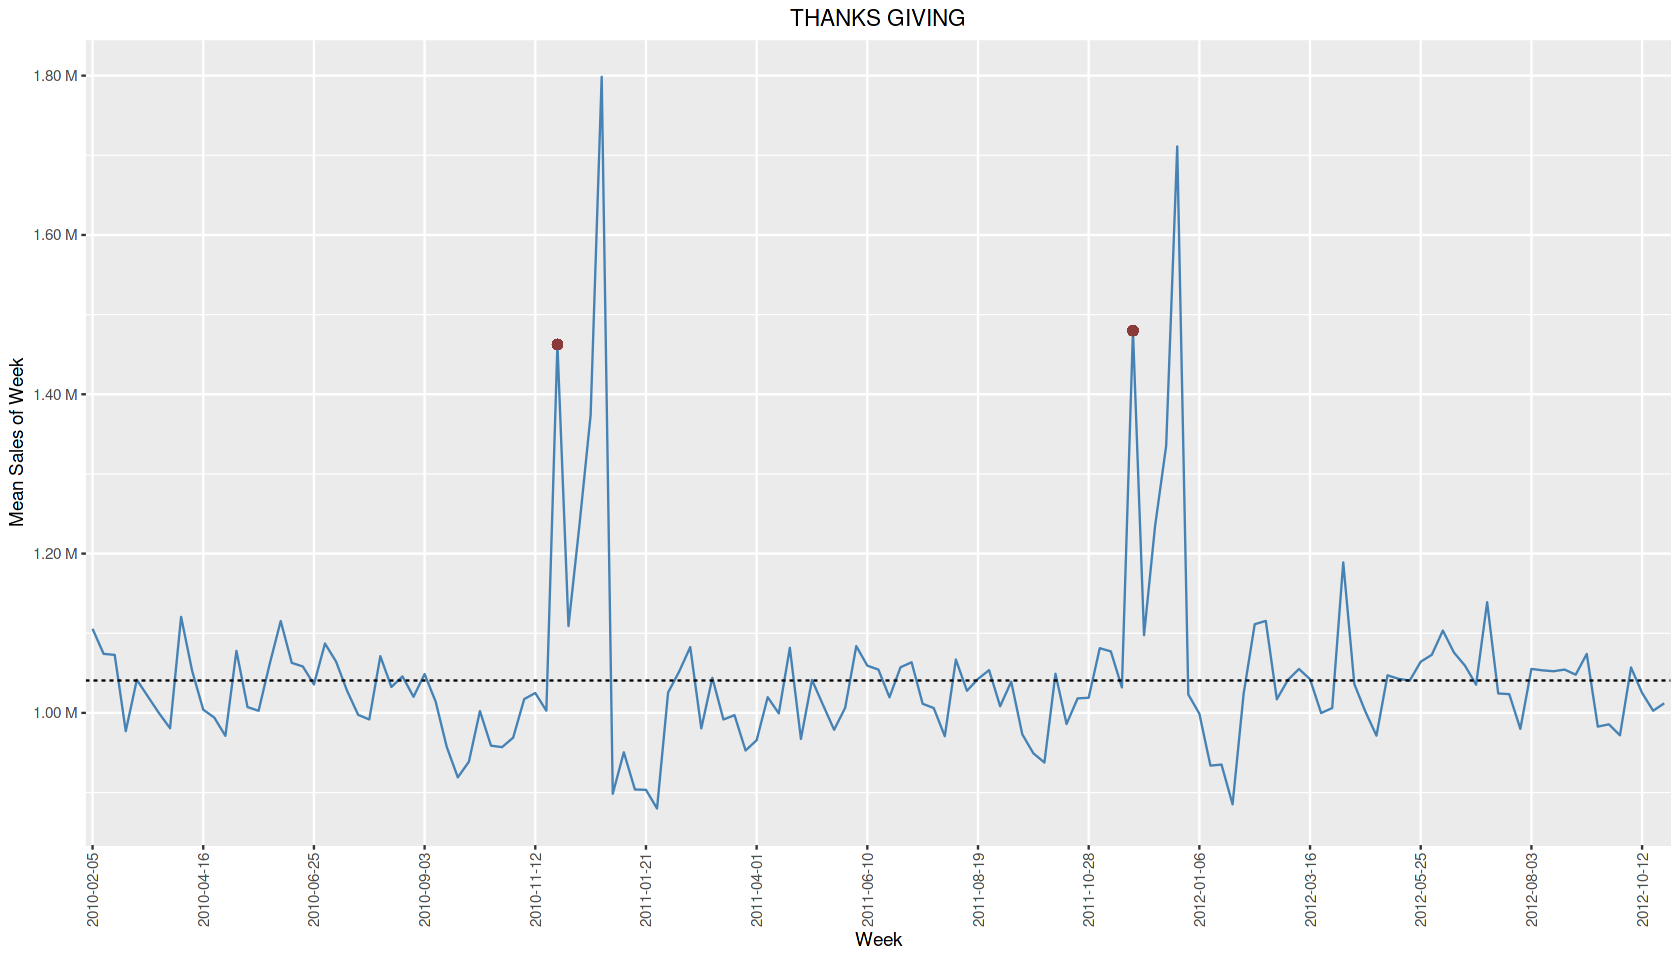

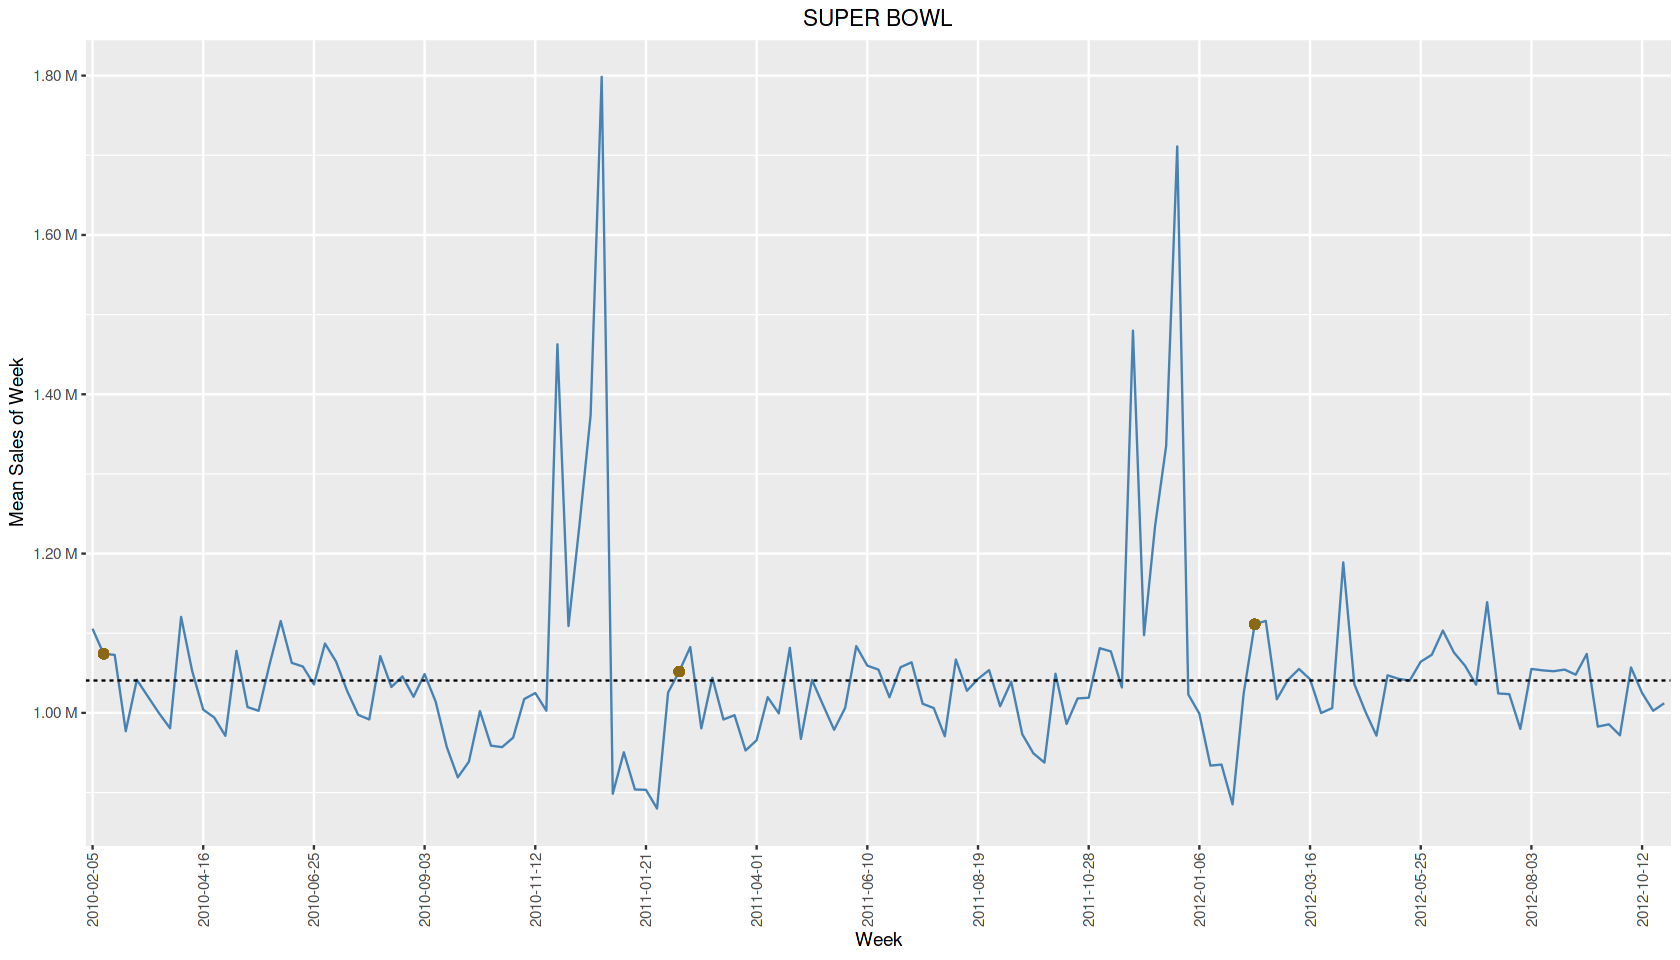

In [24]:

d +ggtitle('CHRISTMAS')+
  geom_point(aes(x = factor("2010-12-31"), y = 898500.4), color = "red", size = 2) +
  geom_point(aes(x = factor("2011-12-30"), y = 1023165.8), color = "red", size = 2) +
  geom_hline(aes(yintercept = mean_non_holiday_sales), linetype="dashed")


d + ggtitle('LABOUR DAY')+
  geom_point(aes(x = factor("2010-09-10"), y = 1014097.7), color = "deeppink", size = 2) +
  geom_point(aes(x = factor("2011-09-09"), y = 1039182.8), color = "deeppink", size = 2) +
  geom_point(aes(x = factor("2012-09-07"), y = 	1074001.3), color = "deeppink", size = 2) +
  geom_hline(aes(yintercept = mean_non_holiday_sales), linetype="dashed")


d + ggtitle('THANKS GIVING')+
  geom_point(aes(x = factor("2010-11-26"), y = 	1462689.0), color = "indianred4", size = 2) +
  geom_point(aes(x = factor("2011-11-25"), y = 1479857.9), color = "indianred4", size = 2) +
  geom_hline(aes(yintercept = mean_non_holiday_sales), linetype="dashed")


d + ggtitle('SUPER BOWL')+
  geom_point(aes(x = factor("2010-02-12"), y = 	1074148.4), color = "goldenrod4", size = 2) +
  geom_point(aes(x = factor("2011-02-11"), y = 1051915.4), color = "goldenrod4", size = 2) +
  geom_point(aes(x = factor("2012-02-10"), y = 1111320.2), color = "goldenrod4", size = 2) +
  geom_hline(aes(yintercept = mean_non_holiday_sales), linetype="dashed")

In [25]:

x<-as.factor(data2$Date)


abis<-strptime(x,format="%d-%m-%Y") 


data2$Mon_Year<-as.Date(abis,format="%Y-%m-%d")

data2$Mon_Year = as.yearmon(data2$Mon_Year)


Month_Year_Sales<-summarise(group_by(data2,Mon_Year),sum(Weekly_Sales))
colnames(Month_Year_Sales)[2] <- "Sales_by_Month"
Month_Year_Sales<- as.data.frame(Month_Year_Sales)


Month_Year_Sales$Mon_Year<- as.character(Month_Year_Sales$Mon_Year)
Month_Year_Sales$Mon_Year<- factor(Month_Year_Sales$Mon_Year, levels=Month_Year_Sales$Mon_Year)

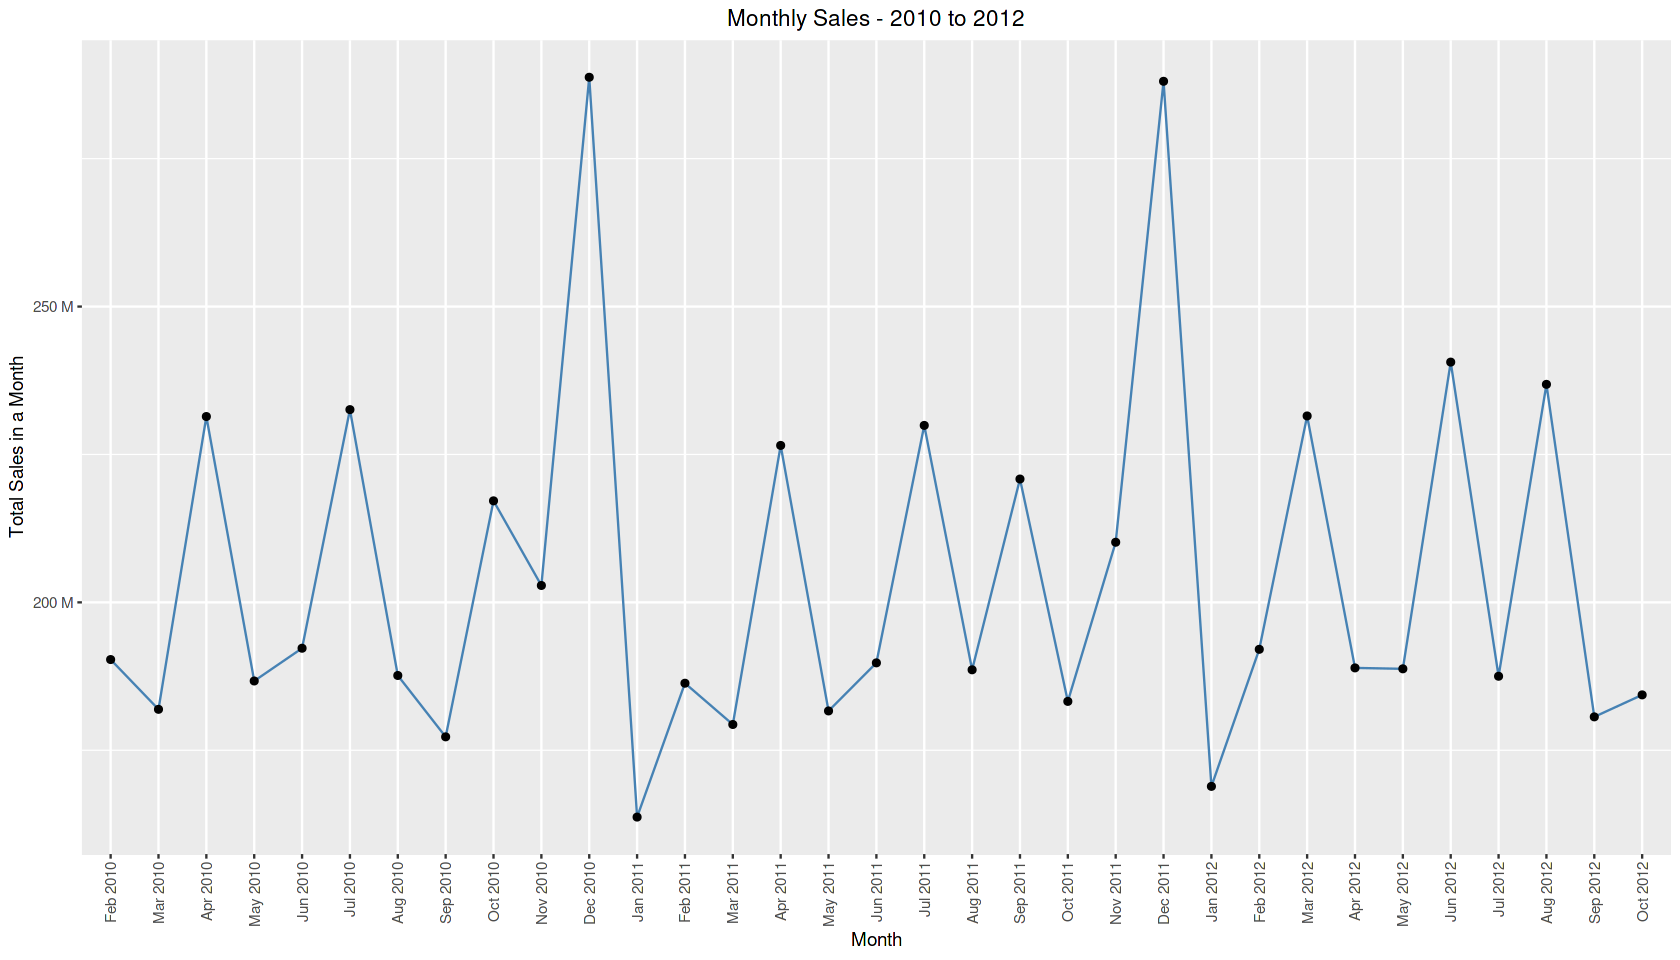

In [26]:


p <- ggplot(data=Month_Year_Sales, aes(x=Mon_Year, y=Sales_by_Month, group=1)) +
  geom_line(color="steelblue")+
  geom_point()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))+
  ggtitle('Monthly Sales - 2010 to 2012')+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("Month") + ylab("Total Sales in a Month")
p

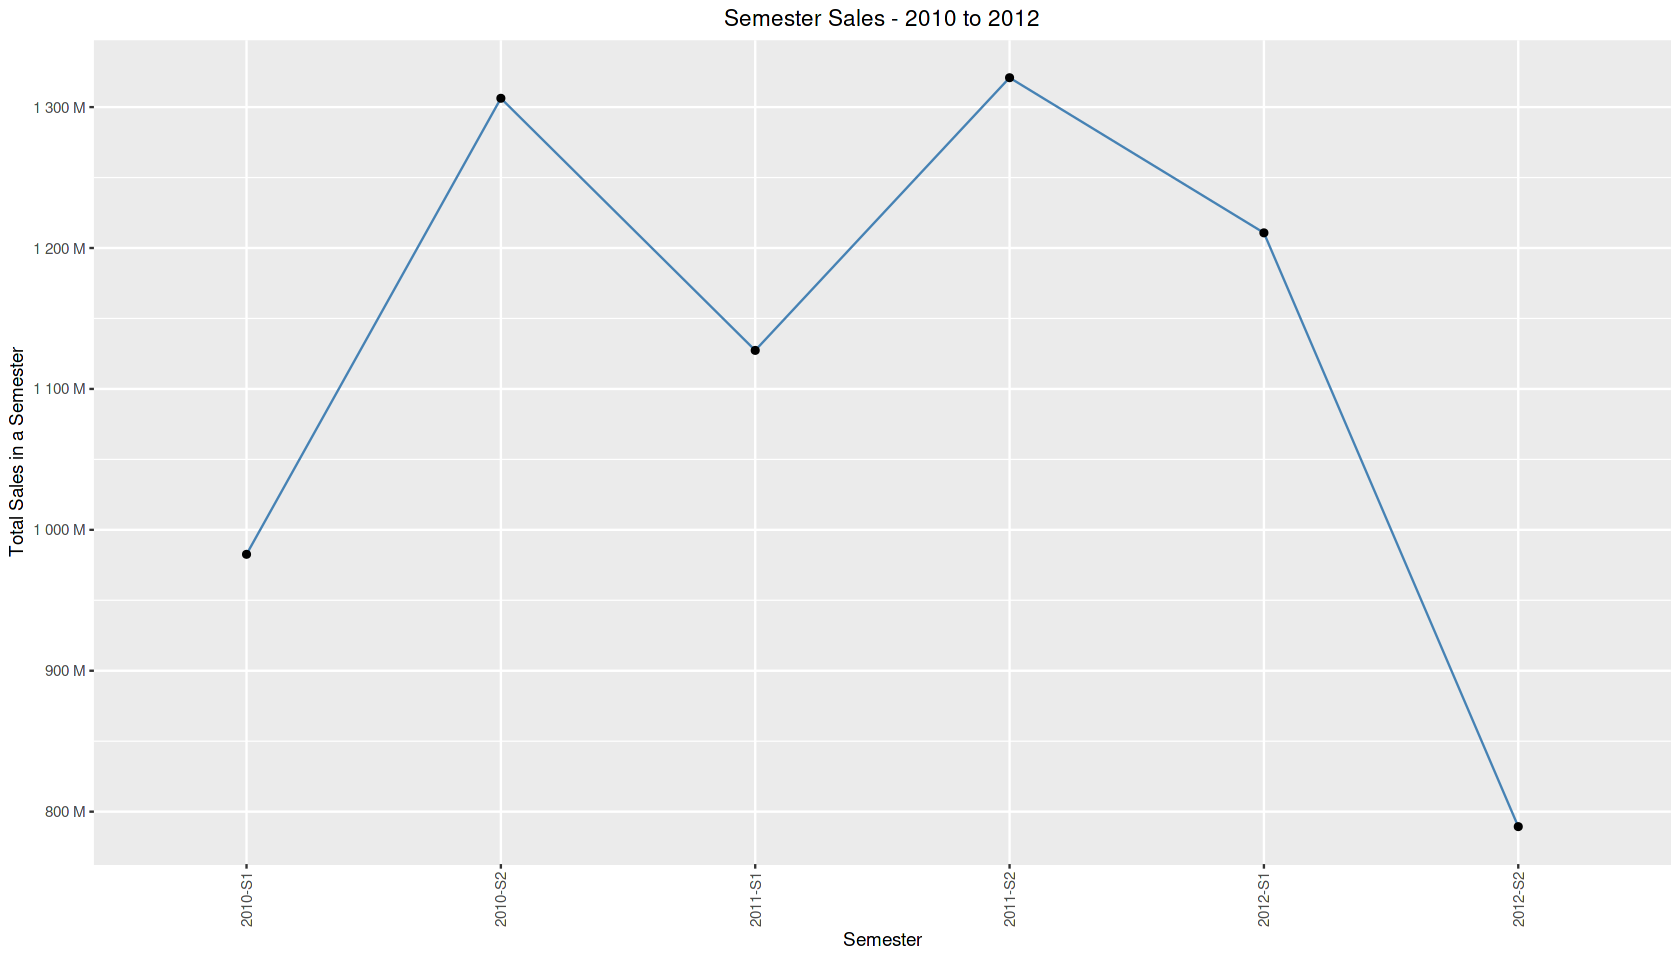

In [27]:


data2$Date <- dmy(data2$Date)


data2$sem <- semester(data2$Date, with_year=TRUE)


s <- aggregate(Weekly_Sales~sem,data=data2, sum)


s$sem_year <- paste(substr(s$sem,1,4),'-S',substr(s$sem,6,6),sep = '')


q <- ggplot(data=s, aes(x=sem_year, y=Weekly_Sales, group=1)) +
  geom_line(color="steelblue")+
  geom_point()+
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_y_continuous(labels = label_number(suffix = " M", scale = 1e-6))+
  ggtitle('Semester Sales - 2010 to 2012')+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("Semester") + ylab("Total Sales in a Semester")
q

In [28]:
#creating same data for alterations
data4 <- data1

#selecting only first store as prediction Required only for first Store
data4<- dplyr::filter(data4, Store ==1)

#changing date column in dataframe to date format & arranging in ascending order as per dates
data4$Date <- lubridate::dmy(data4$Date)
data4 <- dplyr::arrange(data4,Date)

#Creating a week number,month,quarter column in dataframe
data4$Week_Number <- seq(1:length(unique(data4$Date)))

#adding quarter & month columns
data4$month <- lubridate::month(data4$Date)
data4$quarter <- lubridate::quarter(data4$Date)

##Creating a event type dataframe##

# creating Holiday_date vector
Holiday_date <- c("12-02-2010", "11-02-2011", "10-02-2012", "08-02-2013","10-09-2010", "09-09-2011", "07-09-2012", "06-09-2013","26-11-2010", "25-11-2011", "23-11-2012", "29-11-2013","31-12-2010", "30-12-2011", "28-12-2012", "27-12-2013")

#assigning date format to Holiday_date vector
Holiday_date <- lubridate::dmy(Holiday_date)

#Creating Events vector
Events <-c(rep("Super Bowl", 4), rep("Labour Day", 4),rep("Thanksgiving", 4), rep("Christmas", 4))

#Creating dataframe with Events and date
Holidays_Data <- data.frame(Events,Holiday_date)

#merging both dataframes
data4<-merge(data4,Holidays_Data, by.x= "Date", by.y="Holiday_date", all.x = TRUE)

#Replacing null values in Event with No_Holiday
data4$Events = as.character(data4$Events)
data4$Events[is.na(data4$Events)]= "No_Holiday"

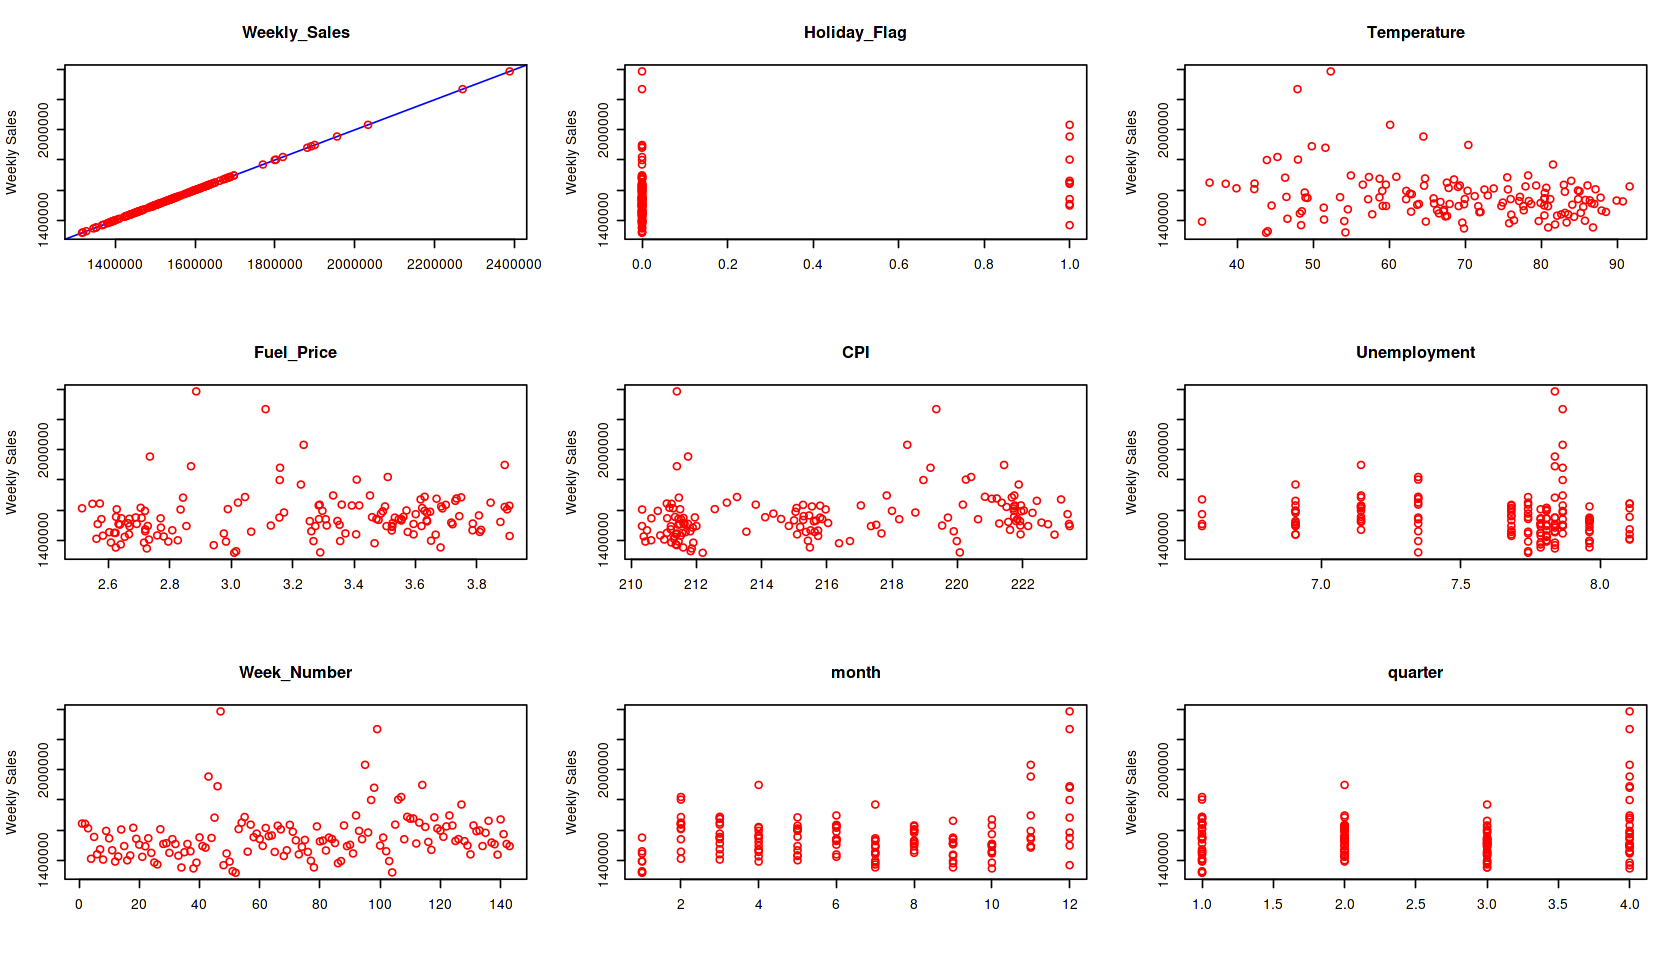

In [29]:
#linear regression graph
par(mfrow=c(3,3))
for(i in 3:11){
  plot(data4[,i], 
       data4$Weekly_Sales,
       main=names(data4[i]), 
       ylab="Weekly Sales", xlab =" ",
       col='red',
  abline(lm(data4[,i] ~ data4$Weekly_Sales, data = data4), col = "blue"))
}

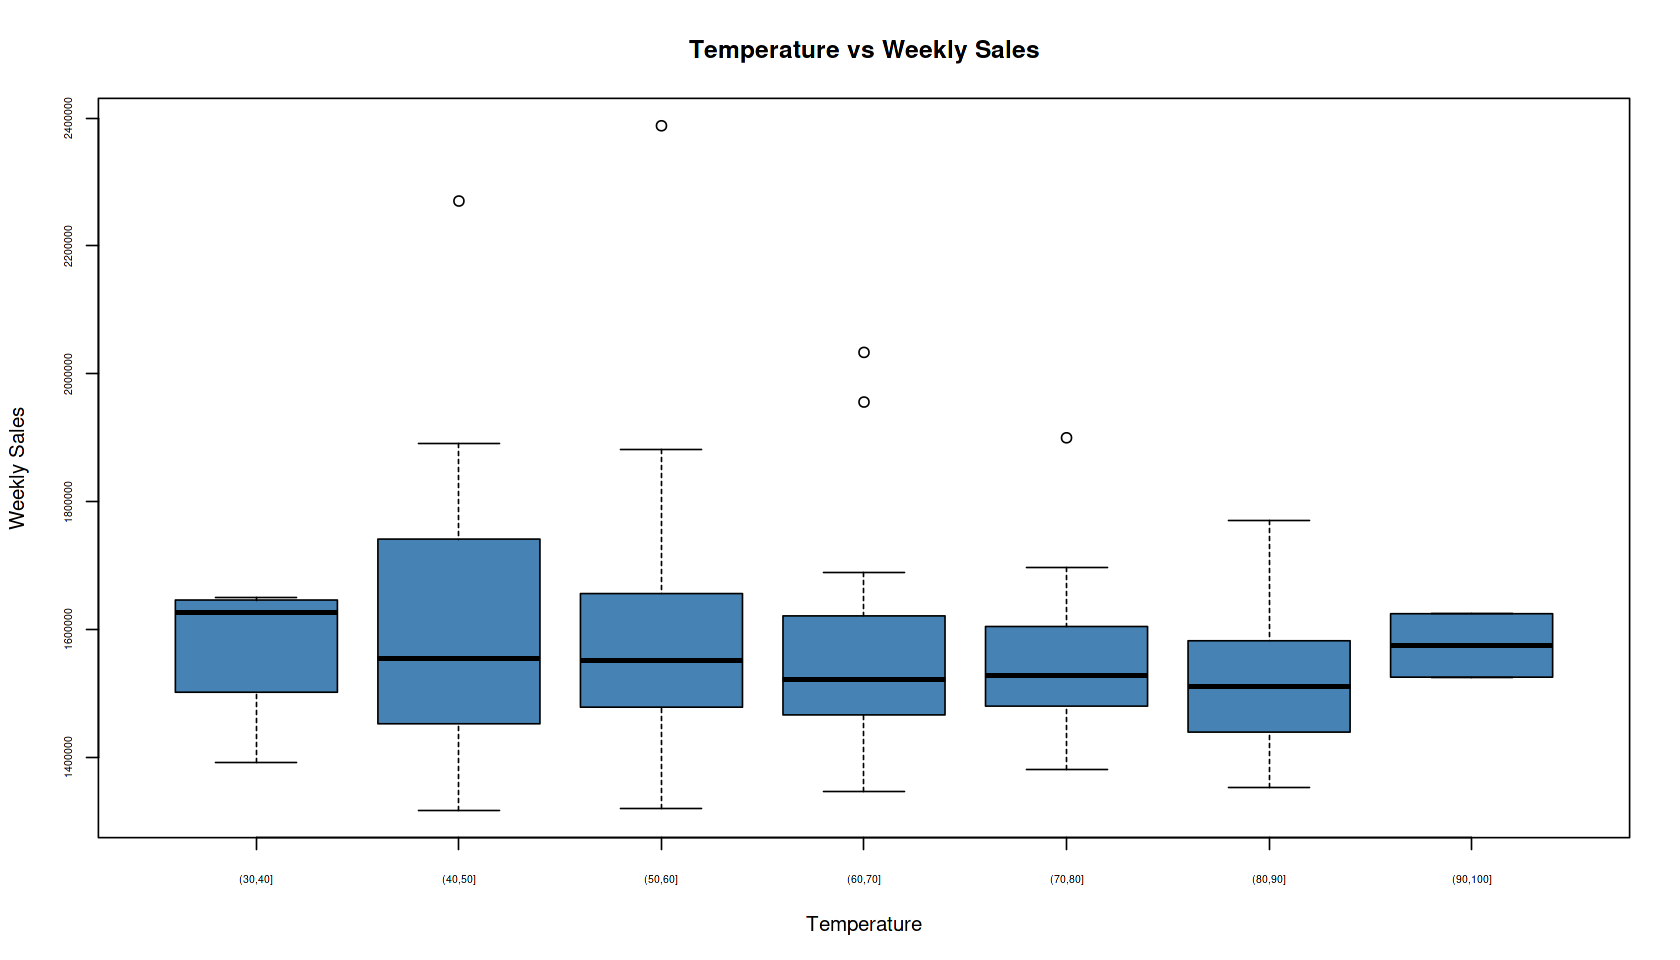

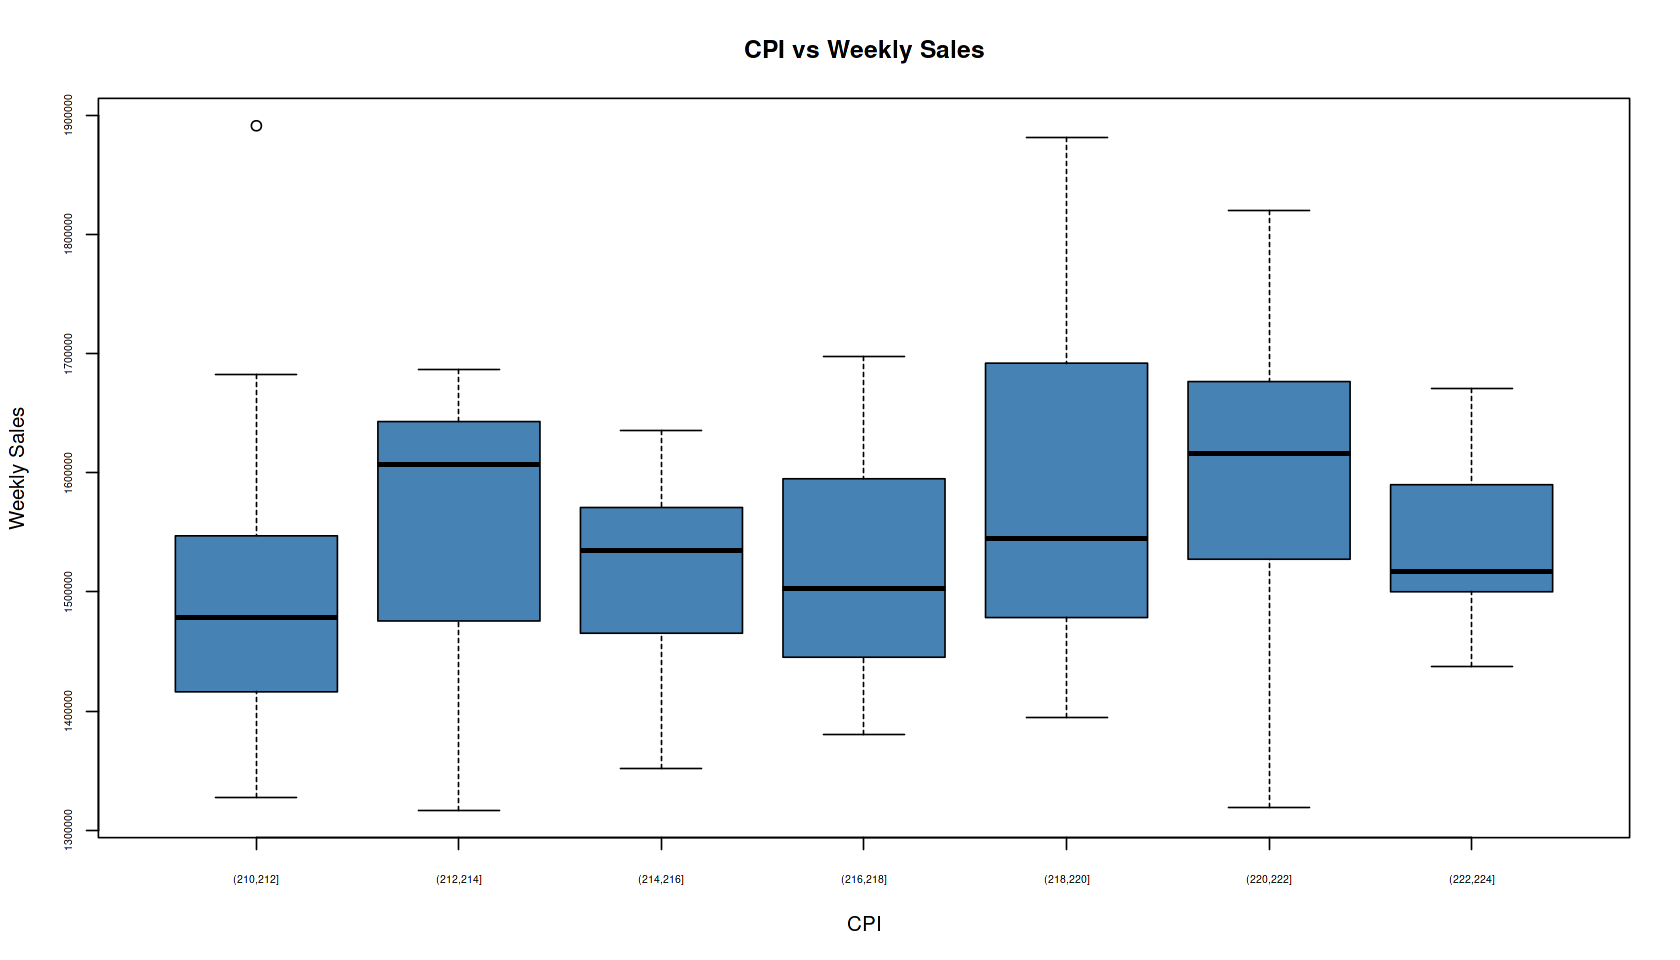

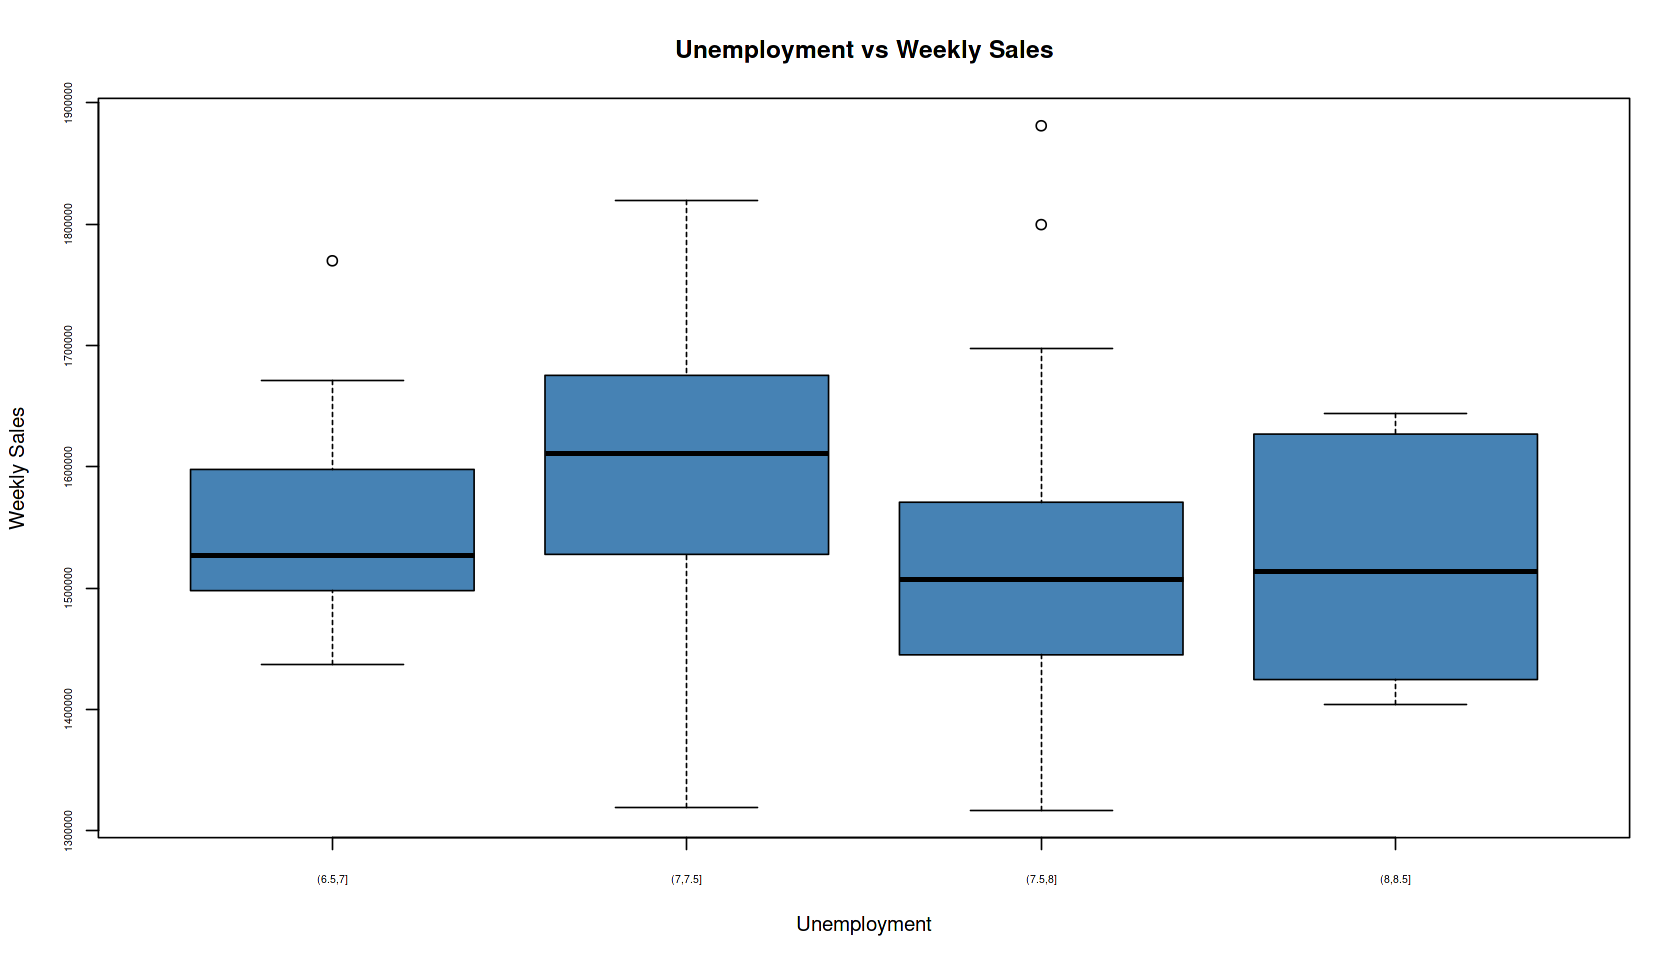

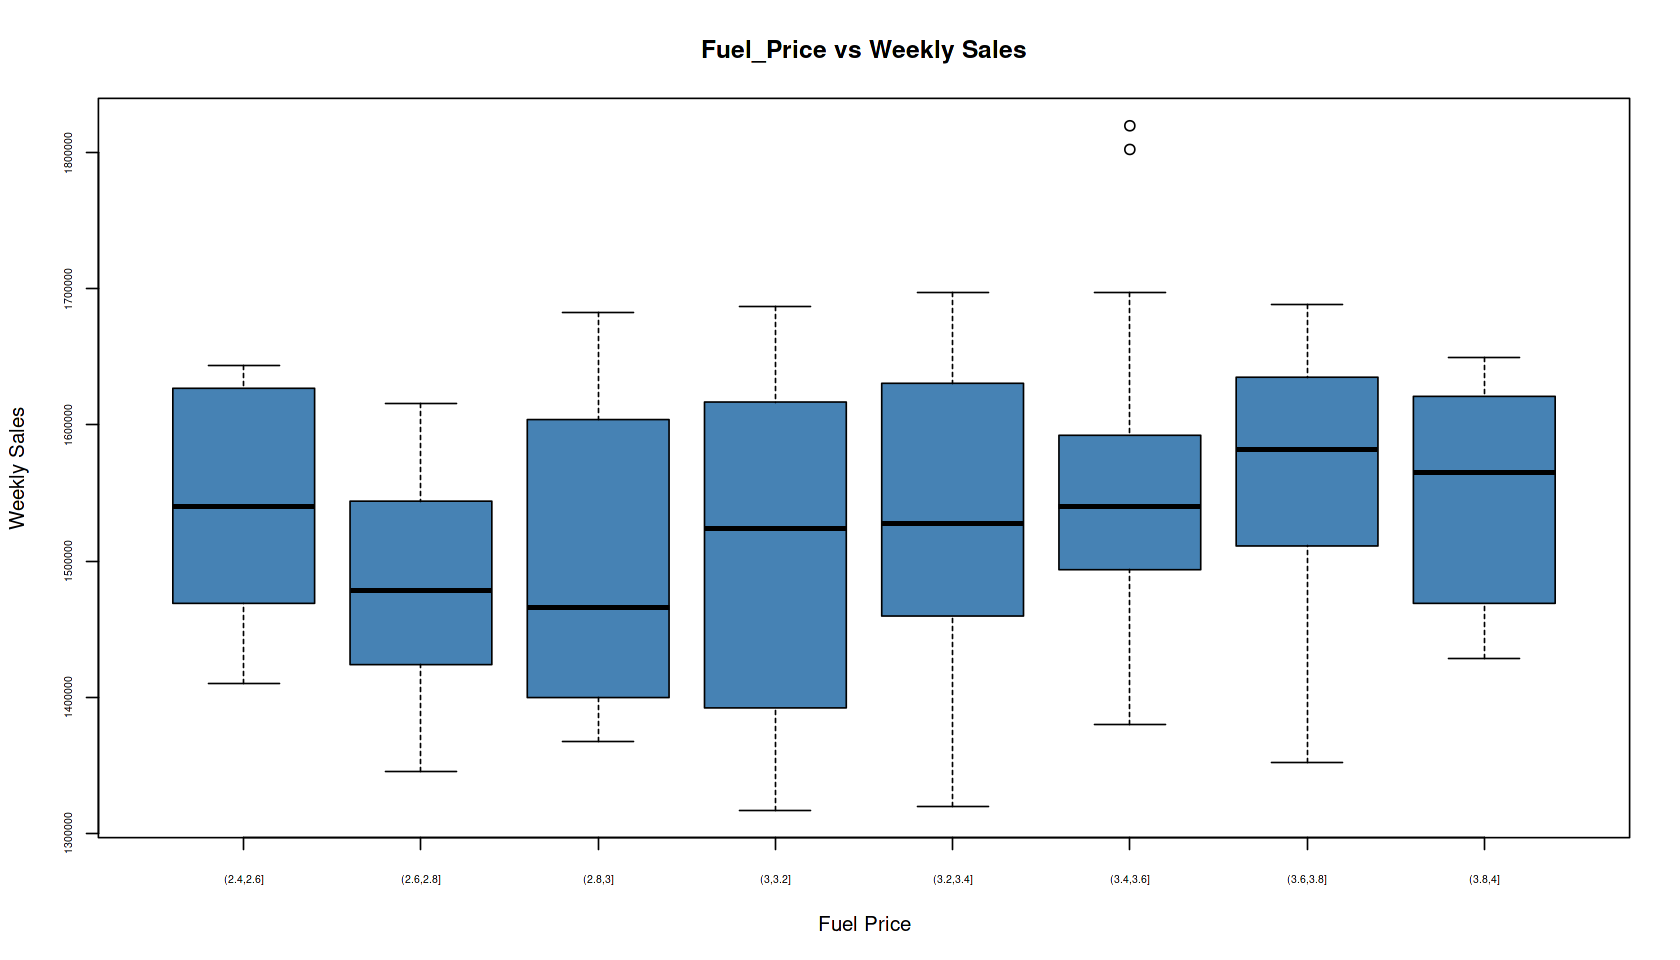

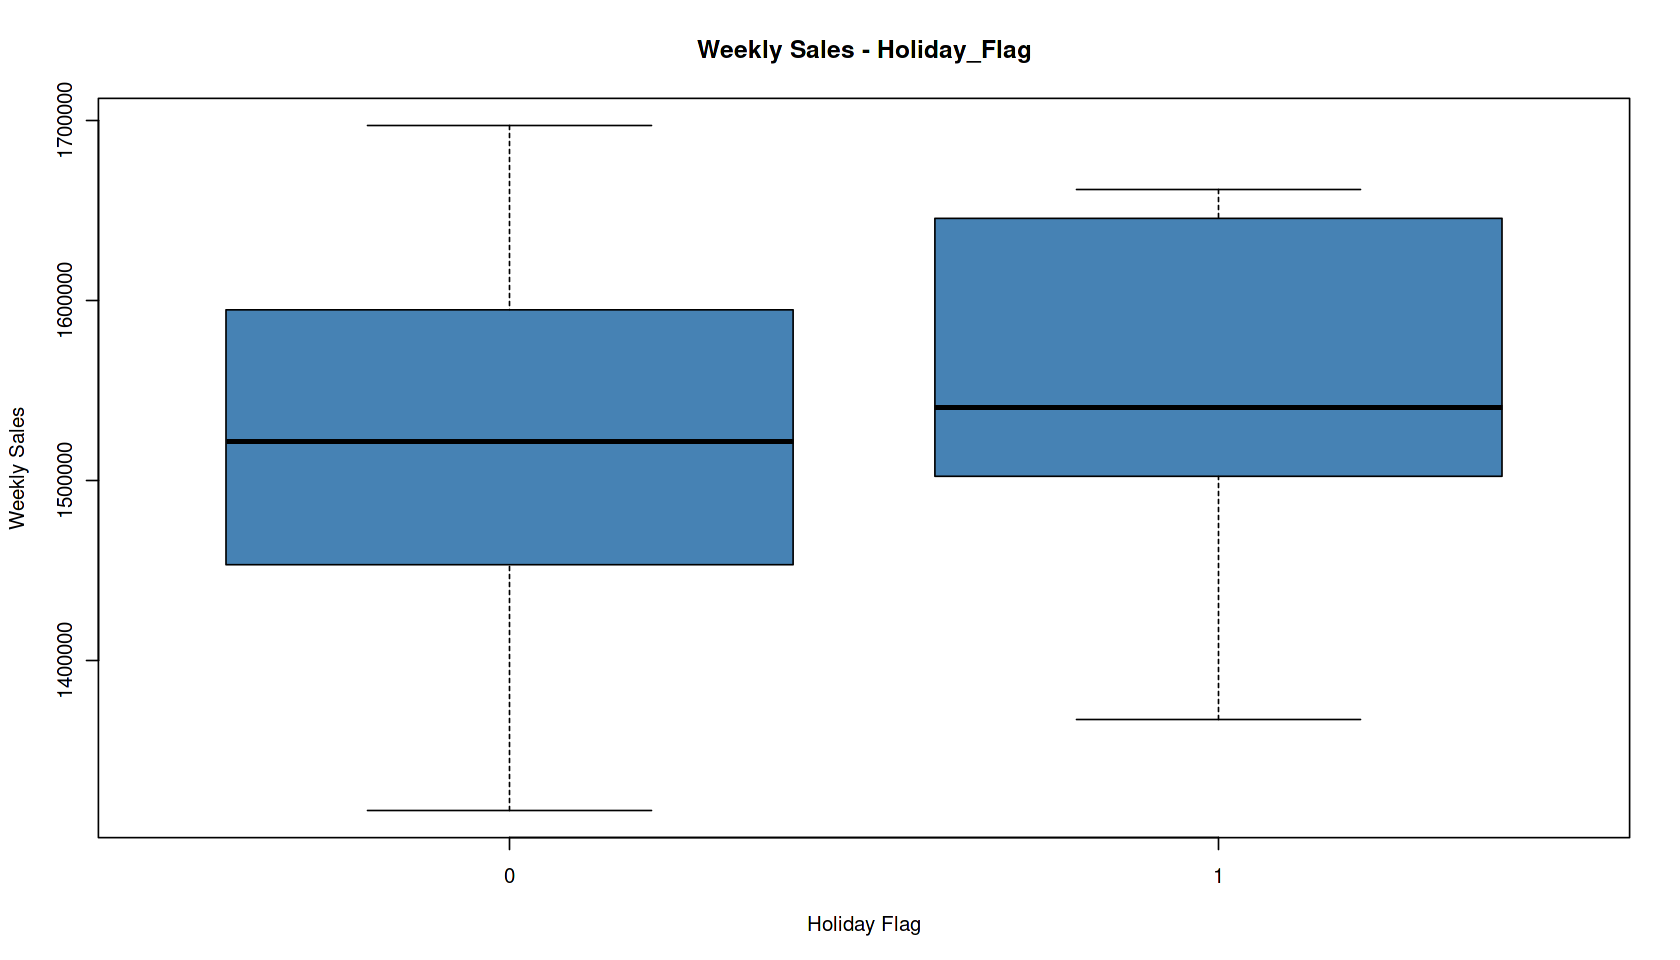

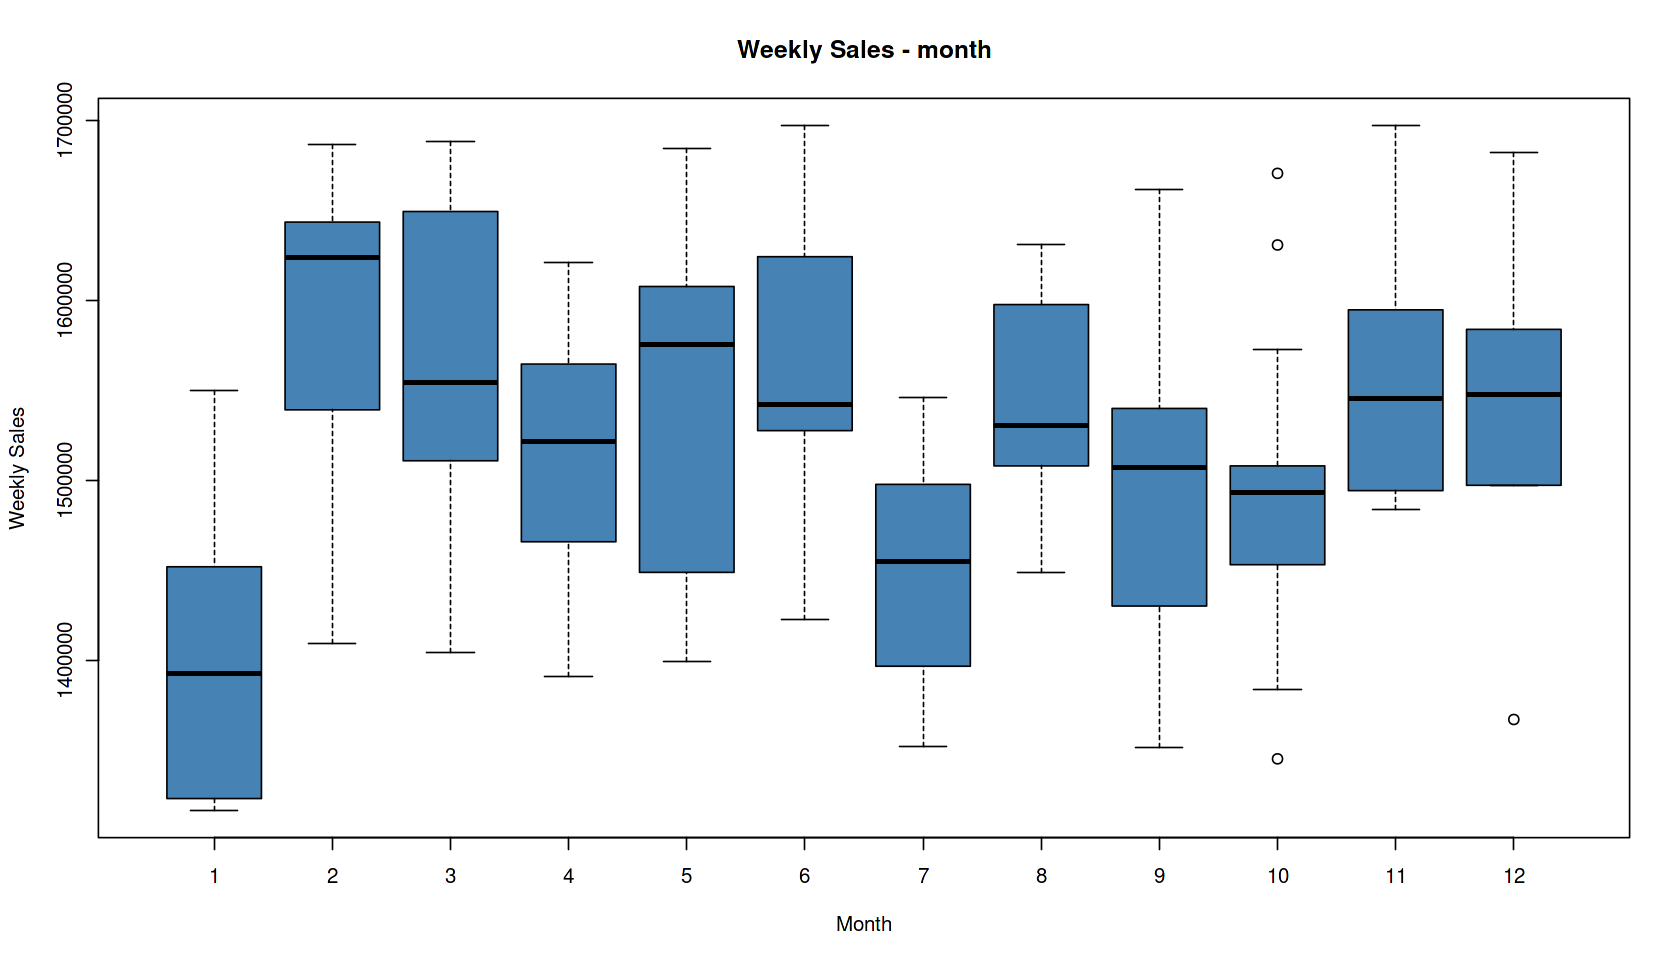

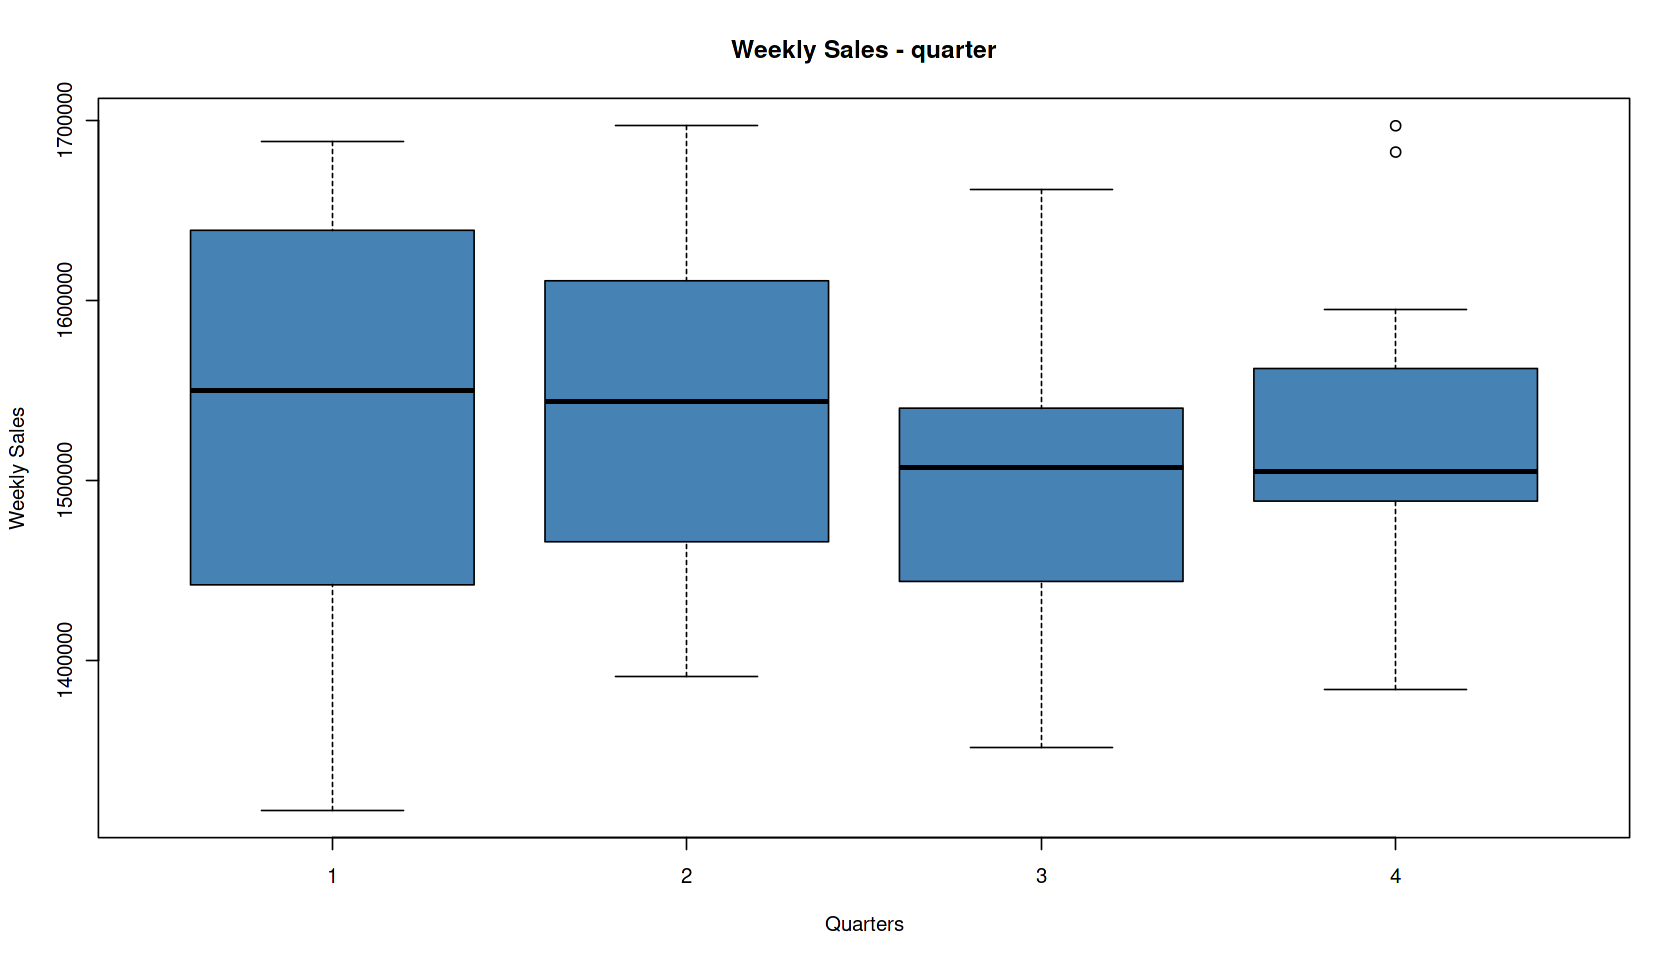

In [30]:
#Boxplot for checking outliers & removing them
par(mfrow=c(1,1))

#Creating a dataframe for outlier treatment
data5 <- data4

#As we are predicting sales, Thought of removing outliers in Sales based on Various parameters
#Temperature Outlier treatment -- found 5 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$Temperature, pretty(data5$Temperature)), main="Temperature vs Weekly Sales", xlab ="Temperature", ylab="Weekly Sales", cex.axis=0.5, col="Steel Blue")
outliers_temp <- boxplot(data5$Weekly_Sales ~ cut(data5$Temperature, pretty(data5$Temperature)), main="Temperature vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_temp),]

#CPI Outlier treatment-found 1 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$CPI, pretty(data5$CPI)), main="CPI vs Weekly Sales",xlab ="CPI", ylab="Weekly Sales", cex.axis=0.5,col="Steel Blue")
outliers_CPI <- boxplot(data5$Weekly_Sales ~ cut(data5$CPI, pretty(data5$CPI)), main="CPI vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_CPI),]

#Unemployment outlier treatment--found 3 outlier and removed them
boxplot(data5$Weekly_Sales ~ cut(data5$Unemployment, pretty(data5$Unemployment)), main="Unemployment vs Weekly Sales",xlab ="Unemployment", ylab="Weekly Sales",  cex.axis=0.5,col="Steel Blue")
outliers_Unemployment <- boxplot(data5$Weekly_Sales ~ cut(data5$Unemployment, pretty(data5$Unemployment)), main="Unemployment vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_Unemployment),]

#fuel price outlier treatment -- found 2 outliers and removed
boxplot(data5$Weekly_Sales ~ cut(data5$Fuel_Price, pretty(data5$Fuel_Price)), main="Fuel_Price vs Weekly Sales", xlab ="Fuel Price", ylab="Weekly Sales", cex.axis=0.5,col="Steel Blue")
outliers_fuel_price <- boxplot(data5$Weekly_Sales ~ cut(data5$Fuel_Price, pretty(data5$Fuel_Price)), main="Fuel_Price vs Weekly Sales", cex.axis=0.5,plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_fuel_price),]

#Outlier treatment for Holiday Flag - No outliers found
boxplot(data5$Weekly_Sales ~ data5$Holiday_Flag, main = 'Weekly Sales - Holiday_Flag',xlab ="Holiday Flag", ylab="Weekly Sales",col="Steel Blue" )

#outlier treatment for month - 4 outliers found and removed
boxplot(data5$Weekly_Sales ~ data5$month, main = 'Weekly Sales - month', xlab ="Month", ylab="Weekly Sales", col="Steel Blue")
outliers_month <- boxplot(data5$Weekly_Sales ~ data5$month, main = 'Weekly Sales - month',plot=FALSE)$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_month),]

#outlier treatment for quarter - 2 outliers found and removed
outliers_quarter <- boxplot(data5$Weekly_Sales ~ data5$quarter, main = 'Weekly Sales - quarter',xlab ="Quarters", ylab="Weekly Sales", col="Steel Blue")$out
data5<- data5[-which(data5$Weekly_Sales %in% outliers_quarter),]


In [31]:
#Removing unnecessary columns and changing structure of Events
data5$Date <-NULL
data5$Store <- NULL
data5$Events <- as.factor(data5$Events)
str(data5)

data5$Holiday_Flag <- as.numeric(data5$Holiday_Flag)
data5$Week_Number <- as.numeric(data5$Week_Number)
data5$quarter <- as.numeric(data5$quarter)

'data.frame':	126 obs. of  10 variables:
 $ Weekly_Sales: num  1643691 1641957 1611968 1409728 1554807 ...
 $ Holiday_Flag: int  0 1 0 0 0 0 0 0 0 0 ...
 $ Temperature : num  42.3 38.5 39.9 46.6 46.5 ...
 $ Fuel_Price  : num  2.57 2.55 2.51 2.56 2.62 ...
 $ CPI         : num  211 211 211 211 211 ...
 $ Unemployment: num  8.11 8.11 8.11 8.11 8.11 ...
 $ Week_Number : int  1 2 3 4 5 6 7 8 9 10 ...
 $ month       : num  2 2 2 2 3 3 3 3 4 4 ...
 $ quarter     : int  1 1 1 1 1 1 1 1 2 2 ...
 $ Events      : Factor w/ 4 levels "Christmas","Labour Day",..: 3 4 3 3 3 3 3 3 3 3 ...


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Week_Number,month,quarter
Weekly_Sales,1.00000000,0.15936349,-0.02610215,0.27923322,0.31318157,-0.25204205,0.25822978,-0.06518967,-0.15353195
Holiday_Flag,0.15936349,1.00000000,-0.16250626,-0.06936937,-0.01493103,0.07009268,-0.01255048,0.08527631,0.03363385
Temperature,-0.02610215,-0.16250626,1.00000000,0.22818320,0.13691384,-0.15276761,0.18815375,0.45477027,0.42336802
Fuel_Price,0.27923322,-0.06936937,0.22818320,1.00000000,0.75511662,-0.50237167,0.78665538,-0.03296547,-0.04492624
CPI,0.31318157,-0.01493103,0.13691384,0.75511662,1.00000000,-0.83636734,0.97533101,0.10978554,0.08863536
Unemployment,-0.25204205,0.07009268,-0.15276761,-0.50237167,-0.83636734,1.00000000,-0.80935295,-0.04646973,-0.05850754
Week_Number,0.25822978,-0.01255048,0.18815375,0.78665538,0.97533101,-0.80935295,1.00000000,0.18794303,0.17189320
month,-0.06518967,0.08527631,0.45477027,-0.03296547,0.10978554,-0.04646973,0.18794303,1.00000000,0.96194027
quarter,-0.15353195,0.03363385,0.42336802,-0.04492624,0.08863536,-0.05850754,0.17189320,0.96194027,1.00000000


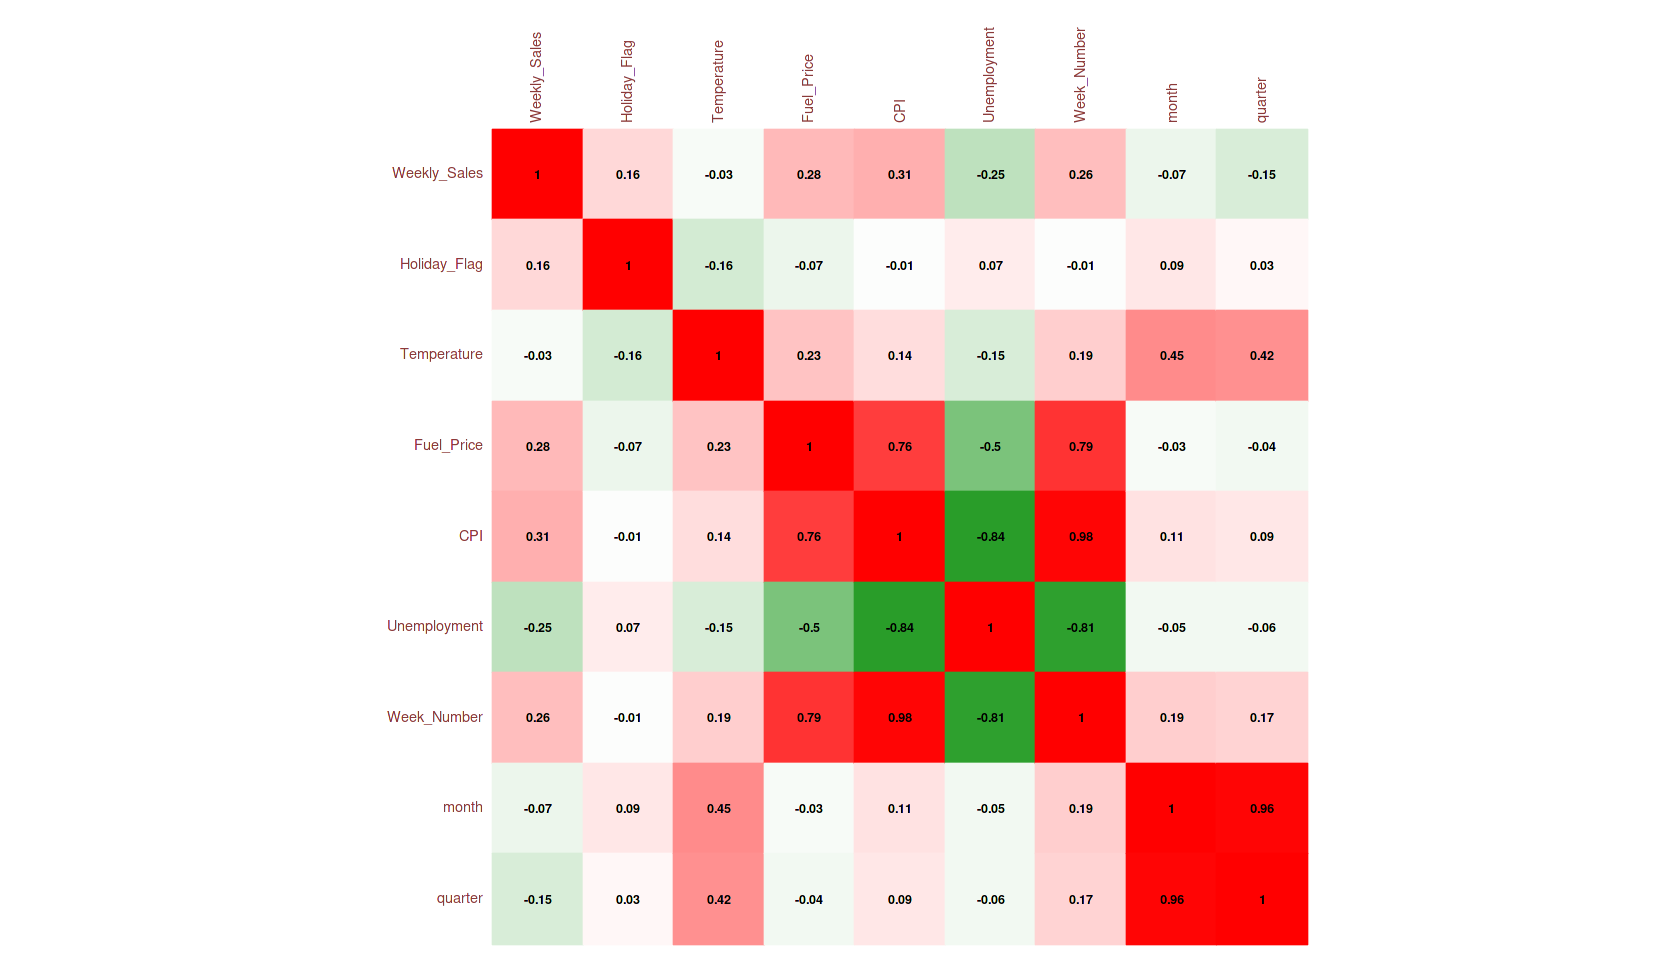

In [32]:
#correlation matrix and corr plot
corr = cor(data5[, c(1:9)])
View(corr)
corrplot(corr, method = "color", cl.pos = 'n', rect.col = "black",  tl.col = "indianred4", addCoef.col = "black", number.digits = 2, number.cex = 0.60, tl.cex = 0.7, cl.cex = 1, col = colorRampPalette(c("green4","white","red"))(100))

In [33]:
#Creating Dummy Variables 

Events <- as.factor(data5$Events)
dummy_Events <- data.frame(model.matrix(~Events))[,-1]

quarter <- as.factor(data5$quarter)
dummy_quarter <- data.frame(model.matrix(~quarter))[,-1]

month <- as.factor(data5$month)
dummy_month <- data.frame(model.matrix(~month))[,-1]


data5 <- cbind(data5,dummy_Events,dummy_quarter,dummy_month)

In [34]:
############ Model- 8 ####################

#Considering parameters - Weekly Sales, Fuel Price, Week number, Unemployment,Event(categorical), month(categorical)
#removed Event bowl to Model 6 as it is causing NA's

# Splitting dataset into training set and test set
set.seed(123) # Seed initializes the randomness -- set.seed helps to fix randomness fixed everytime you open. you can write any number inside the set.seed()
library(caTools)

#Considering all parameters - Weekly Sales, Holiday FlagTemp, Fuel, CPI,Unemployment, Weeknumber, Event(categorical), quarter(categorical), month(categorical)
dataset <- data5[, c(1,4,6,7,11:12, 17:27 )]

#Creating a sample split and divided test & training sets in 30-70 ratio respectively
sample = sample.split(dataset, SplitRatio = 0.7) # Returns a vector with T for 70% of data
trainingSet = subset(dataset, sample == T)
testSet = subset(dataset, sample == F)

# Create model 
model = lm(formula = Weekly_Sales ~ . , data = trainingSet)
summary(model)


Call:
lm(formula = Weekly_Sales ~ ., data = trainingSet)

Residuals:
    Min      1Q  Median      3Q     Max 
-123134  -46522    1841   44510  114359 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1637841.6   345979.4   4.734 1.26e-05 ***
Fuel_Price         49812.9    47710.2   1.044 0.300380    
Unemployment      -50517.0    50231.0  -1.006 0.318350    
Week_Number         -146.0      757.6  -0.193 0.847794    
EventsLabour.Day   79280.1    86347.1   0.918 0.361984    
EventsNo_Holiday  -25662.8    72364.6  -0.355 0.724031    
month2            260225.4    42181.7   6.169 5.19e-08 ***
month3            189405.7    39016.8   4.854 8.11e-06 ***
month4            137171.4    44248.7   3.100 0.002876 ** 
month5            173484.8    43940.5   3.948 0.000199 ***
month6            206825.1    38475.7   5.375 1.15e-06 ***
month7             95704.1    37717.1   2.537 0.013614 *  
month8            172879.3    37006.9   4.672 1.58e-05 ***
month9 

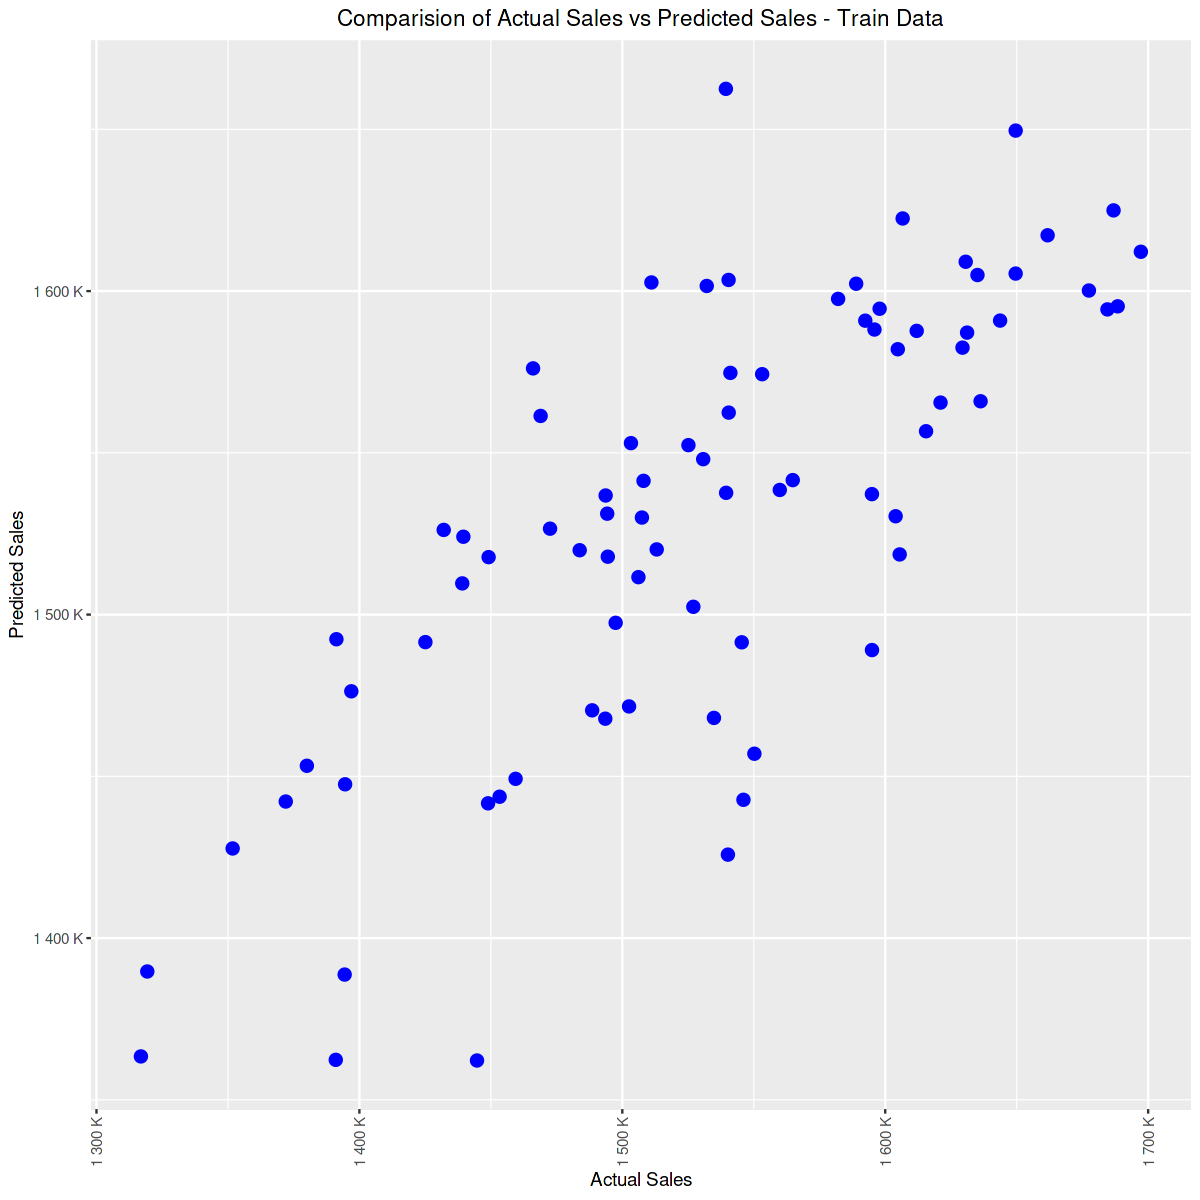

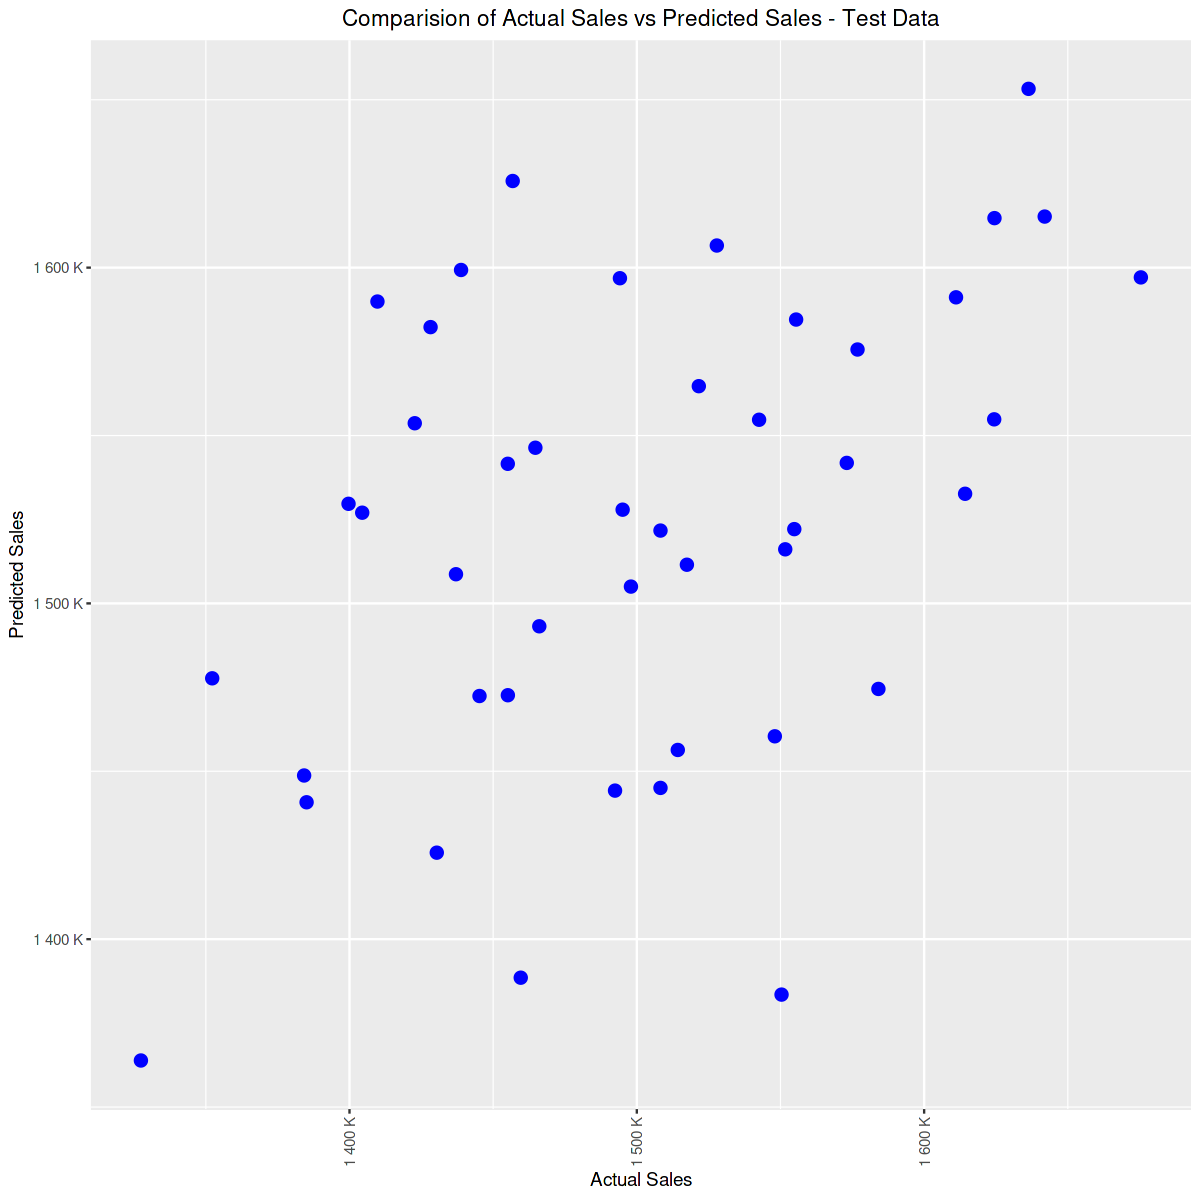

In [35]:
options(repr.plot.width = 10, repr.plot.height = 10)

# Visualizing train set results
y_pred_train = predict(model, newdata = trainingSet)
ggplot() + 
  geom_point(aes(x=trainingSet$Weekly_Sales,y=y_pred_train), size=3,colour = "Blue") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3))+
  scale_x_continuous(labels = label_number(suffix = " K", scale = 1e-3))+
  ggtitle('Comparision of Actual Sales vs Predicted Sales - Train Data')+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("Actual Sales") + ylab("Predicted Sales")

# Visualizing the test set results
y_pred_test = predict(model, newdata = testSet)
ggplot() + 
  geom_point(aes(x=testSet$Weekly_Sales,y=y_pred_test), size =3, colour = "Blue") +
  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))+
  scale_y_continuous(labels = label_number(suffix = " K", scale = 1e-3))+
  scale_x_continuous(labels = label_number(suffix = " K", scale = 1e-3))+
  ggtitle('Comparision of Actual Sales vs Predicted Sales - Test Data')+
  theme(plot.title = element_text(hjust = 0.5))+
  xlab("Actual Sales") + ylab("Predicted Sales")

In [36]:
### Parameters to validate the accuracy of the model and improvise.
MAPE(y_pred_test,testSet$Weekly_Sales)
RMSE(y_pred_test,testSet$Weekly_Sales)

[1] 0.04486674

[1] 83085.05

In [37]:
#checking multi collinearity
car::vif(model)

Fuel_Price     Unemployment      Week_Number EventsLabour.Day 
        7.994779         6.692571        18.694408         4.939172 
EventsNo_Holiday           month2           month3           month4 
        5.633513         2.266747         2.792676         3.237113 
          month5           month6           month7           month8 
        3.192164         2.447541         2.351973         2.512373 
          month9          month10          month11          month12 
        3.031300         2.065474         1.868701         2.617314